# Evaluating Credit Risk Prediction Using the Statlog German Credit Dataset
# CI702 Applied Artificial Intelligence



### 1. Introduction

#### 1.1. Project Overview
This notebook presents a review of existing machine learning models for credit risk assessment. The primary functionality is binary classification: predicting whether a loan applicant represents "good" or "bad" credit risk. The analysis follows a structured workflow illustrated in the section below.

#### 1.2. Problem statement - Cost Matrix
Financial institutions face significant challenges in accurately assessing credit risk. Misclassifying high-risk applicants as low-risk can lead to substantial financial losses, while being overly conservative may result in lost revenue from rejected creditworthy customers. Financial institutions must comply with the regulatory framework, which requires robust risk assessment models. Fair credit assessment is also essential to prevent discrimination while promoting financial inclusion.

This project addresses these challenges by evaluating an AI-driven credit scoring approach that balances accuracy with cost considerations. It implements Scikitlearn based Machine Learning Models, informed by prior research, to predict credit risk as a binary classification task. The cost-sensitive nature of this problem is illustrated by the cost matrix shown in Table 1.

This reflects real-world risk in credit scoring, where granting credit to a high-risk applicant results in significantly greater financial loss (type I error) or loss of business opportunities (type II error).  The rows represent the actual class labels, and columns represent the predicted class labels. Correct classifications incur zero cost, misclassifying a good applicant as bad incurs a cost of 1, and misclassifying a bad applicant as good incurs a higher cost of 5. This asymmetric cost structure directly influences model selection and evaluation.

| Actual/Predicted | Good (1)  | Bad (2) |
|------------------|-----------|---------|
| Good (1)         |  0        | 1       |
| Bad (2)          |  5        | 0       |

_Table 1: Cost Matrix, Source: UCI Irvine, 1994_

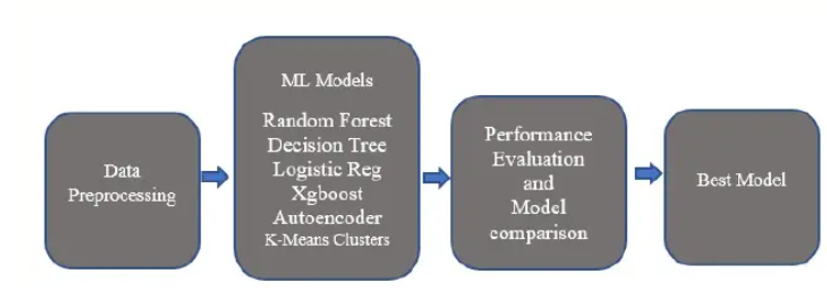
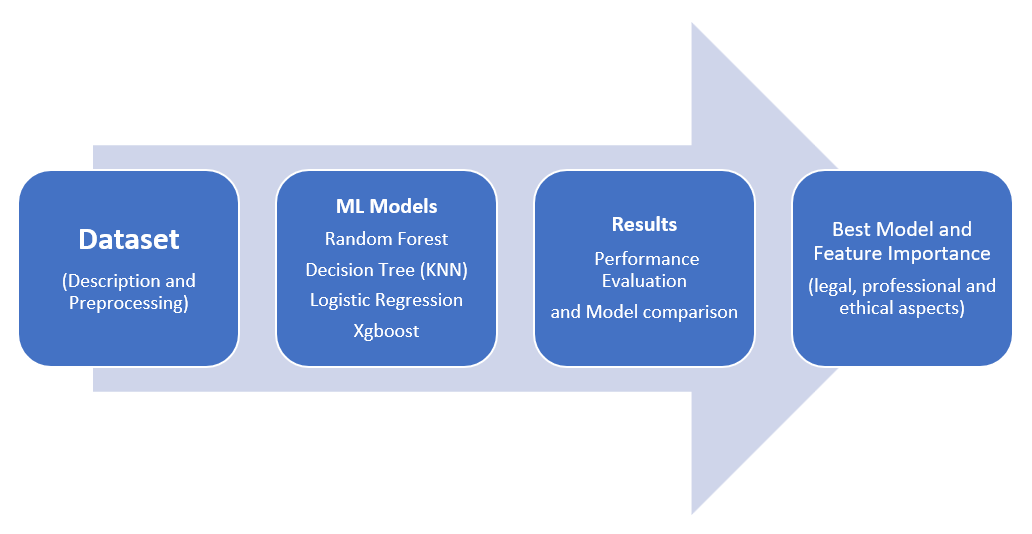
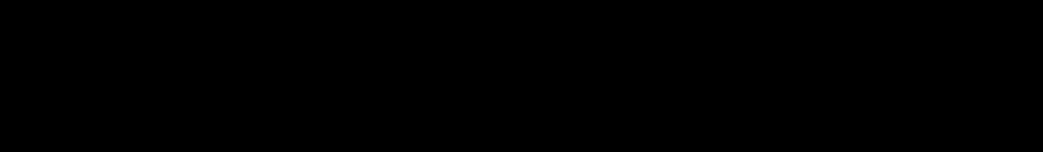

#### 1.4. Research questions
This project is centred around three research questions
1. Can machine learning models correctly classify loan applicants as good or bad credit risks using the German Credit dataset?
2. How do different machine learning models compare in performance when applied to a real-world credit risk problem?
3. Which factors have the greatest influence on credit risk predictions?

#### 1.5. Methodology (link to research papers)
To address the above research questions, this study follows the structured methodology illustrated in Figure 1. The process begins with Exploratory Data Analysis (EDA) to understand the characteristics and limitations of the dataset. This is followed by data preparation and preprocessing, and the training of selected machine learning models informed by prior research.

Model performance is then evaluated and compared using multiple evaluation metrics, leading to the identification of the most suitable model for credit risk prediction. The final stage includes an analysis of the most influential predictors, a discussion of legal, professional, and ethical considerations, and an outline of the study’s limitations and potential directions for future work.

#### figure 1: Method

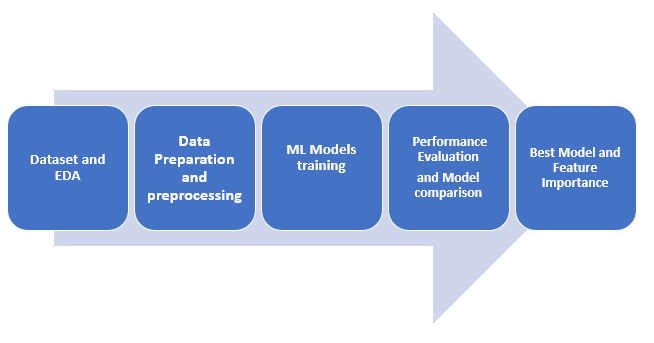

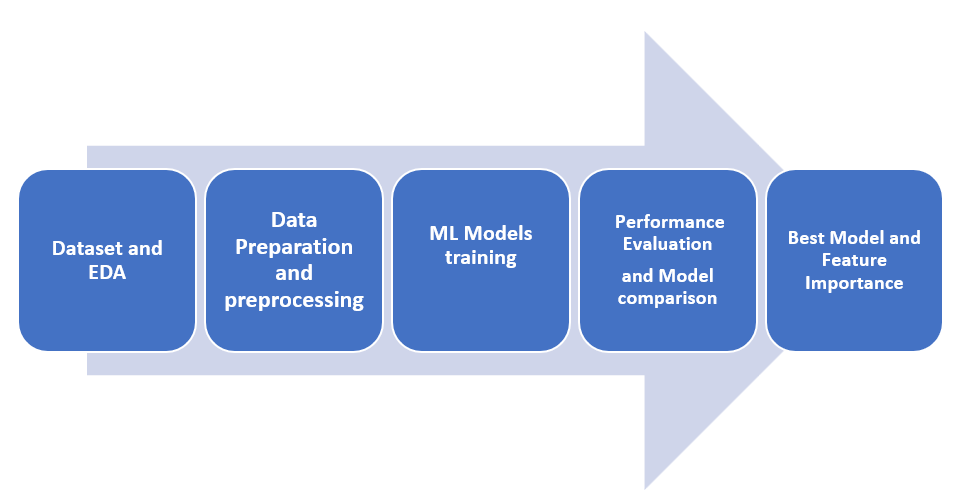


###  2. Dataset and Preprocessing
The German Credit Dataset from the UCI repository (UCI Irvine, 1994) was used for the evaluation. The UCI repository, hosted by the University of California, provides open access to a wide range of well-documented datasets across diverse application domains. Each dataset is accompanied by detailed documentation and links to prior research, making it a credible data source.  This section covers the data structure and preprocessing stages.

#### 2.1. Data structure (talk about the original data and new with reference
The UCI repository (UCI Irvine, 1994) provides one of the most popular datasets on credit risk analysis, originally prepared by Professor Hofmann (Mais Haj Qasem, 2019). Two versions of the dataset are available.

The original dataset consists of 1000 instances with 20 mixed attributes, comprising 7 numerical and 13 (categorical) variables. The last (21st) column is the target variable. Presented as 1 for good credit and 2 for bad credit, the target variable signifies applicants' creditworthiness (Hua, 2025).

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from itables import show
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE


import warnings

warnings.filterwarnings('ignore')

# pandas display
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

# Set aesthetic parameters for better visualization
sns.set_style("white")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
plt.rcdefaults()

#load original datasets
original_df = pd.read_csv('german.data', sep=r'\s+', header=None)
print("Shape of data (rows, columns):", original_df.shape)

#Column names based on dataset documentation (UCI Irvine, 1994)
original_columns = ['check_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings', 'employment', 'installment', 'person_status', 'other_debt', 'residence', 'property', 'age', 'other_install', 'housing', 'credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'credit_risk']

original_df.columns = original_columns
show(original_df.head(5))

summary = original_df.describe().T
display(summary)

display(original_df.info())

Shape of data (rows, columns): (1000, 21)


Loading ITables v2.6.2 from the internet... (need help?)


,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
credit_risk,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   check_status    1000 non-null   object
 1   duration        1000 non-null   int64 
 2   credit_history  1000 non-null   object
 3   purpose         1000 non-null   object
 4   credit_amount   1000 non-null   int64 
 5   savings         1000 non-null   object
 6   employment      1000 non-null   object
 7   installment     1000 non-null   int64 
 8   person_status   1000 non-null   object
 9   other_debt      1000 non-null   object
 10  residence       1000 non-null   int64 
 11  property        1000 non-null   object
 12  age             1000 non-null   int64 
 13  other_install   1000 non-null   object
 14  housing         1000 non-null   object
 15  credits         1000 non-null   int64 
 16  job             1000 non-null   object
 17  dependents      1000 non-null   int64 
 18  telephone

None

 The original dataset consists of 1000 instances with 20 mixed attributes, comprising 7 numerical and 13 (categorical) variables. The last (21st) column is the target variable. Presented as 1 for good credit and 2 for bad credit, the target variable signifies applicants' creditworthiness (Hua, 2025).
The first table above shows the first 5 rows of the original row dataset, which consists of a mixture of continuous and categorical variables in integer (numeric) and alphanumeric (e.g. A11, A23) formats. These formats are not compatible with classical machine learning algorithms like Logistic regression, Support Vector Machines (SVM), and k-Nearest Neighbors (KNN), which require a numeric input.

 Relative to the mean, the standard deviation is low, indicating low variability. Minimum (min) / Maximum (max) check for unrealistic values and understanding feature ranges. A large gap between the 75% quartile and the max value may indicate outliers. Duration, Credit Amount and Age have moderate to large differences between the 75% quartile and the max value.

Following the description of the original German Credit dataset, this study uses the numeric version, suitable for machine learning (ML) algorithms that require numeric input (Mais Haj Qasem, 2019). Using this version, produced for the StatLog project by Strathclyde University (UCI Irvine, 1994), ensures compatibility with the selected models. The dataset allows comparison with prior research and requires the use of a cost matrix shown in table one above.
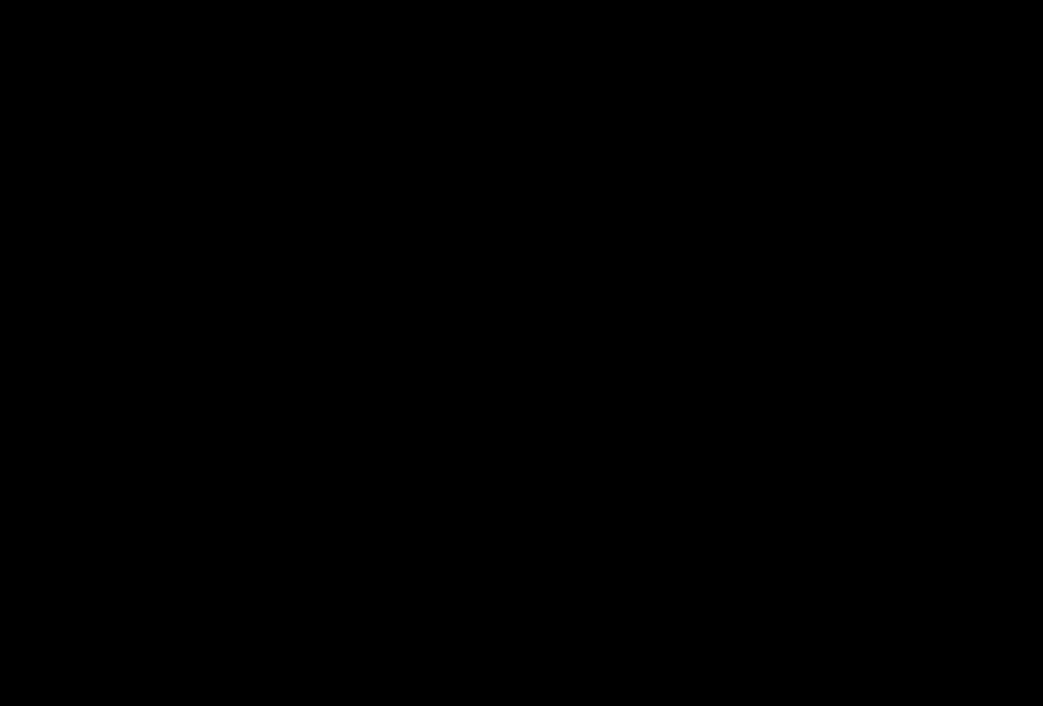

In [20]:
#Load numeric data version
numeric_df = pd.read_csv('german.data-numeric', sep=r'\s+', header=None)

#Name columns 23 features + 1 target
numeric_df.columns = [f"feature_{i}" for i in range(numeric_df.shape[1] - 1)] + ["target"]

print(f"\nFirst 5 rows:")
show (numeric_df.head(5))

# initial information
print (f"Shape of data (rows, columns):", numeric_df.shape)

print (f"\nData types:\n{numeric_df.dtypes.value_counts()}")



First 5 rows:


Loading ITables v2.6.2 from the internet... (need help?)


Shape of data (rows, columns): (1000, 25)

Data types:
int64    25
Name: count, dtype: int64


Loaded directly into Python using pandas, the remaining 1000 instances expand to 24 numerical features, all coded as integers. The original dataset was edited, and several additional binary (indicator) variables were added to support algorithms that cannot handle categorical variables (Mais Haj Qasem, 2019). Each feature was assigned a generic name (feature_0 to feature_23), and the final column labelled target represents the credit risk outcome. The next sections dive deeper into the preprocessing steps through observation of the patterns in the dataset.

##### 2.2. Data Preprocessing

Data preprocessing helps improve data quality, reduce overfitting, ensure suitability for formats for machine learning models, speed up training and lead to more precise predictions (GeeksforGeeks, 2025).

The numeric version underwent several preprocessing steps, as the categorical variables were encoded as integers using One-Hot and label encoding methods. Ordinal and nominal variables like instalment rate, purpose, housing, and job were transformed into dummy variables to avoid imposing false ordinal relationships. This allows the model to learn independent risk contributions for each category, avoids misleading linear assumptions and effectively captures category-specific risk.

A consistent feature engineering transformation was applied on feature 3 (a continuous variable called Credit Amount) as summarised in the formula below.

###### Formular - Feature Engineering
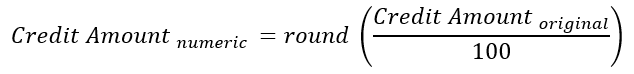

where
* Credit_Amount_numeric is the new credit amount, like 12
* Credit_Amount_original is the previous credit amount, like 1169
* round() is round to the nearest integer
* values greater than or equal to 0.5 are rounded up
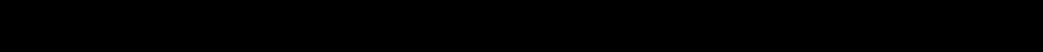
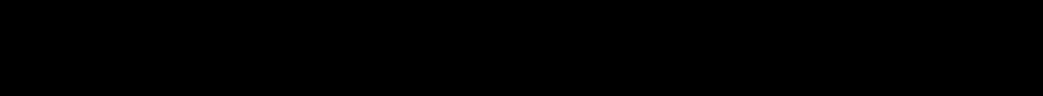
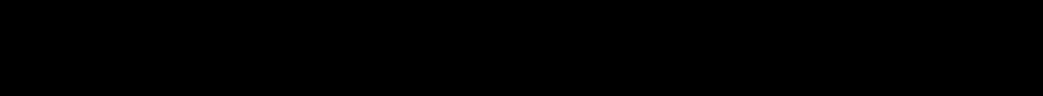
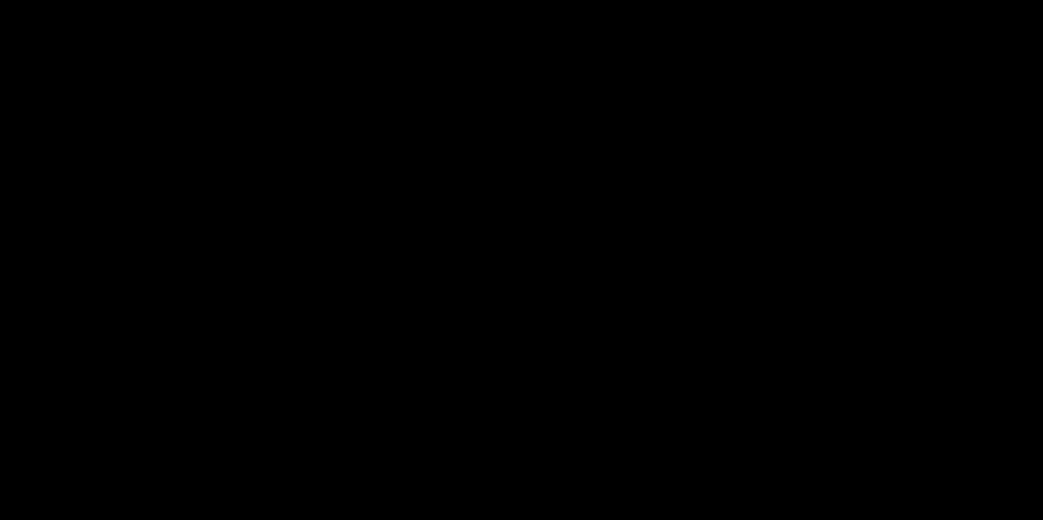

In [21]:
#Verify the transformation for Credit Amount Variable from the original dataset
original_amounts = [1169, 5951, 2096, 7882, 4870]   #first five rows
numeric_value = [12, 60, 21, 79, 49]       #first five rows

for orig, num in zip(original_amounts, numeric_value):
    calculated = round (orig / 100)
    print (f"Original: {orig} , Numeric:{num}, Calculated: {calculated}, Match: {num == calculated}")

Original: 1169 , Numeric:12, Calculated: 12, Match: True
Original: 5951 , Numeric:60, Calculated: 60, Match: True
Original: 2096 , Numeric:21, Calculated: 21, Match: True
Original: 7882 , Numeric:79, Calculated: 79, Match: True
Original: 4870 , Numeric:49, Calculated: 49, Match: True


A few data transformations were implemented because the data was already encoded. The target variable (y) was converted to binary 1=good and 0=bad. The categorical encoding was investigated, and feature distributions were validated.

The dataset has no missing values and no duplicates, confirming data integrity. It is mostly ordinal encodings, designed to avoid redundancy. It represents distinct financial concepts of duration, credit amount, age, employment, etc. All data is in integer format, which makes it suitable for scikit-learn classifiers requiring numerical input.

In [22]:
#separate features and target
x = numeric_df.drop(['target'], axis = 1) #Features
y = numeric_df['target']  #Target variable

#validation
display("Feature columns:", list (x.columns))
display("Target column:", y.name)
assert len(x.columns) == 24

# map target values: 2(bad) -> 0, 1 (Good) -> 1
y = y.map ({1:1, 2:0})
show (y.describe())

# Check for missing and duplicate values (summary only)
total_missing = x.isnull().sum().sum()
total_duplicates = x.duplicated().sum()

print("=== Data Quality Summary ===")
print(f"Total missing values in dataset: {total_missing}")
print(f"Total duplicate rows in dataset: {total_duplicates}")

'Feature columns:'

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23']

'Target column:'

'target'

Loading ITables v2.6.2 from the internet... (need help?)


=== Data Quality Summary ===
Total missing values in dataset: 0
Total duplicate rows in dataset: 0


### 3. Exploratory Data Analysis (EDA)

##### 3.1. Target Variable Distribution Analysis

The dataset has imbalanced classes, having 70% good credit and 30% bad credit. This reflects the real-world lending scenarios and requires careful handling to avoid bias toward the majority class (more good than bad credit cases). This indicates a classification problem.


Target distribution: target
1    700
0    300
Name: count, dtype: int64


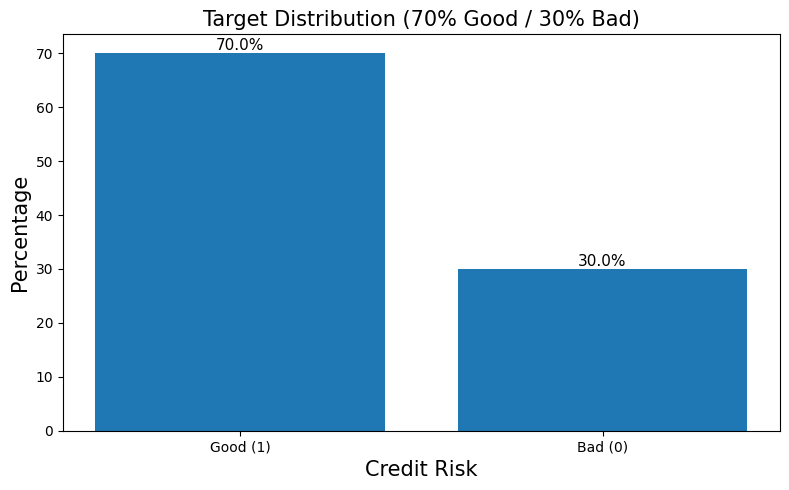

In [23]:
print (f"\nTarget distribution: {y.value_counts()}")
#print (f"\nClass Ratio: {y.value_counts()[1]/y.value_counts()[0]:.2f}:1")

#Plot
percentage = y.value_counts() / y.value_counts().sum() * 100

plt.figure(figsize=(8, 5), dpi=100)
bars = plt.bar(
    ['Good (1)', 'Bad (0)'],
    percentage
)

plt.title('Target Distribution (70% Good / 30% Bad)', fontsize=15)
plt.xlabel('Credit Risk', fontsize=15)
plt.ylabel('Percentage', fontsize=15)

# Add percentage labels on bars
for bar, pct in zip(bars, percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{pct:.1f}%',
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.tight_layout()
plt.show()

##### 3.2. Feature Distributions
Skewness and Kurtosis describe distributional shape and tail behaviour under the assumption of a true numerical scale. The analysis was limited to continuous features listed below with a true numerical scale.

| Feature | Variable Name    | Data type       |
|---------|------------------|-----------------|
| 1       | Duration (month) | Continous       |
| 3       | Credit Amount    | Continous       |
| 9       | Age (years)      | Continous       |

The encoded categorical variables are of nominal, ordinal or binary and have few unique value counts, making the distribution shape metrics invalid


=== Univariate Distribution Analysis ===


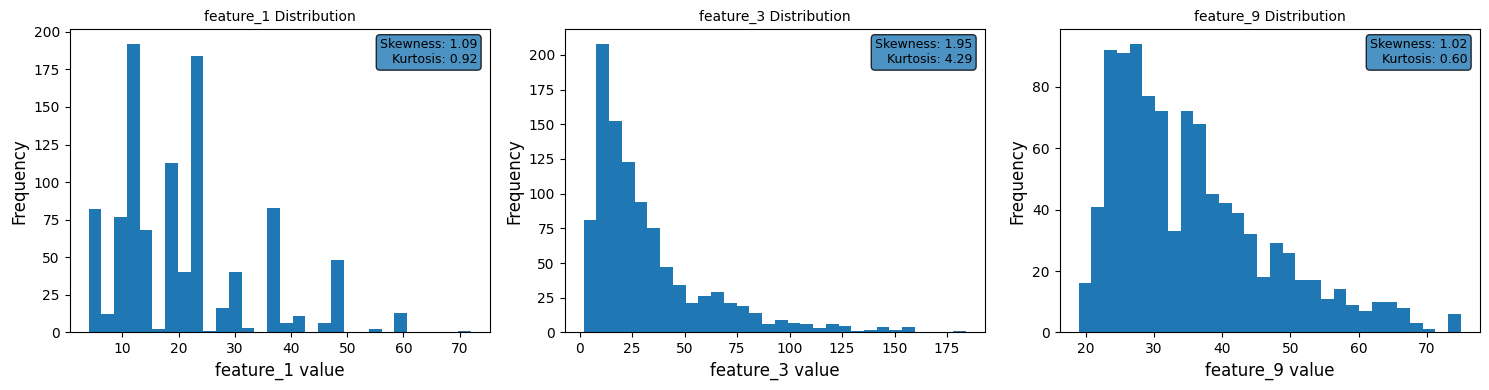

In [24]:
print("\n=== Univariate Distribution Analysis ===") #AI retype
# Select continuous features (columns with more than 2 unique values)
continuous_features = [
    col for col in x.columns
    if x[col].dtype in ['int64', 'float64'] and x[col].nunique() > 10
]
n_features = len(continuous_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Plot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.ravel()

for idx, (col) in enumerate(continuous_features):
    data = x[col].dropna()
    ax = axes[idx]

    #Histogram
    ax.hist(data.dropna(), bins=30)
    ax.set_title(f'{col} Distribution', fontsize=10)
    ax.set_xlabel(f'{col} value', fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

    #Skewness & Kurtosis
    sk = data.skew()
    ku = data.kurt()   # Fisher definition (same as scipy with fisher=True)

    # Annotate
    ax.text(
        0.97, 0.97,
        f"Skewness: {sk:.2f}\nKurtosis: {ku:.2f}",
        transform=ax.transAxes,
        ha="right",
        va="top",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", alpha=0.8)
    )

# Remove unused axes
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



Feature 3, which is the credit amount variable, has an extremely high positive kurtosis and right-skewed (long-tail) distribution. Most applicants ask for small loans (tall bars on the left), and a few applicants (long tail) ask for very large amounts.

Feature 9 (Age variable) has a moderate kurtosis (clear peak around 20-30 years range, but fatter) and a lower kurtosis (the tail stretches moderately to the right).

Feature 1, which is the duration in months variable, has a spiky distribution on intervals of 11, 18 and 24 months. This implies that in the real world, People tend to choose rounded numbers for loan duration.
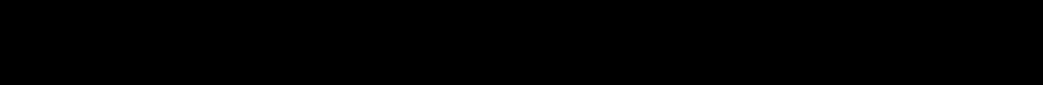
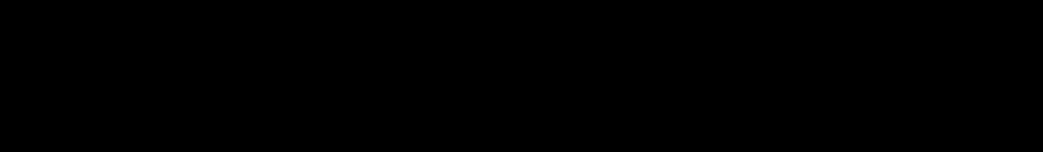

#### 3.3. Feature - Target (Bivariate) Analysis
This section examines the relationship between individual input features and the target variable, credit risk (1=good credit, 0 = bad credit). The objective is to understand whether and how specific features are associated with credit outcomes before applying machine learning models.

=== Bivariate Box Plots (Continuous Variables) ===


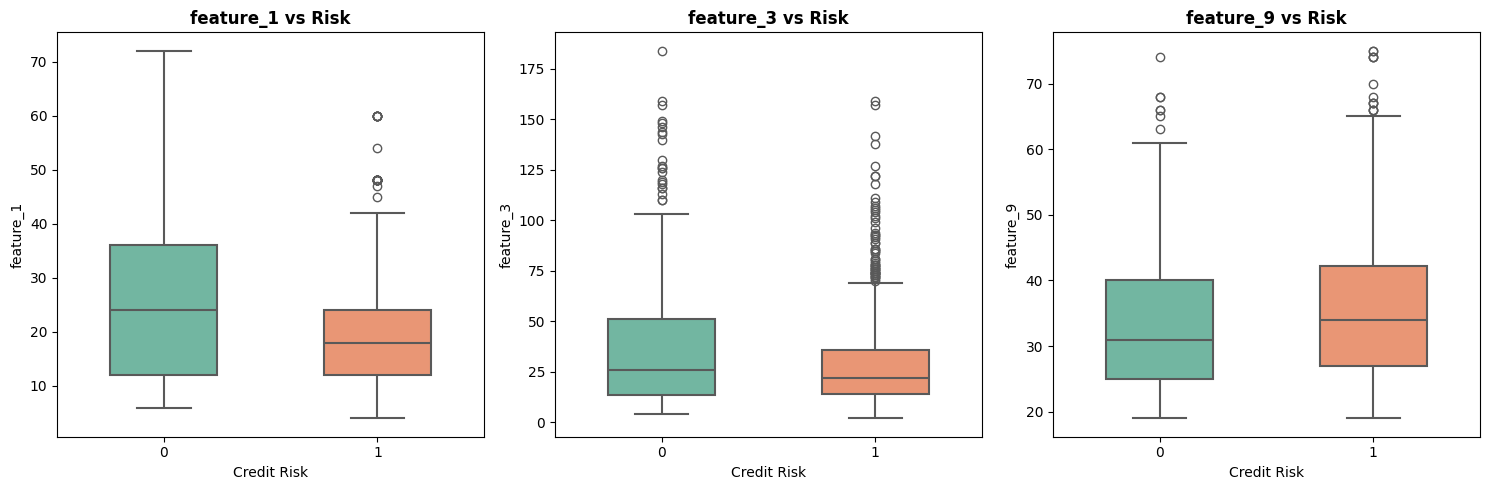

In [25]:
# Combine Features and Target temporarily for easier plotting
#Assuming 'x' is your features DataFrame and 'y' is your target Series
plot_df =  x.copy()
plot_df['Target'] = y

print("=== Bivariate Box Plots (Continuous Variables) ===")

#1.Dynamic Selection: Columns with More than 10 unique values
continuous_features = [
    col for col in x.columns
    if x[col].nunique() > 10
]

# Set up Grid
n_cols = 3
n_rows = math.ceil(len (continuous_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.ravel()

# Loop and Plot
for idx, col in enumerate(continuous_features):
    ax = axes[idx]

    label = f"{col}"

    # Box Plot
    sns.boxplot(
        x='Target',
        y=col,
        data=plot_df,
        ax=ax,
        palette='Set2',
        width=0.5,
        linewidth=1.5
    )

    ax.set_title(f'{label} vs Risk', fontsize=12, fontweight='bold')
    ax.set_xlabel('Credit Risk', fontsize=10)
    ax.set_ylabel(label, fontsize=10)

# Hide empty subplots
for i in range(len(continuous_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Green on the box plot above stands for bad credit (0), while Orange is good (1) or safe credit. Illustrated in the figure above, duration is the strongest differentiator, and time increases risk. The Median line for Bad credit (0) is slightly higher (at 24 months) than for good credit (1) (at 18 months). The bad (0) box is taller, meaning there is a high variance, implying risky applicants take loans ranging from short to very long term. Safe (good orange box) ones rarely takes loans longer than 40 months.

The middle box (credit amount (feature 9) variable) is defined by extreme skewness and outliers (small circles above the whiskers, both in the good and bad credit groups, and slightly higher in the good credit. While risky applicants tend to borrow slightly larger amounts, there are plenty of good applicants with high loan amounts (outliers above the orange box). This variable would require log transformations for linear models like logistic regression, but is fine for tree-based models like Random Forest.

The third box plot shows that good credit (1) is higher (Median of 34years) than for bad credit (30 years). However, there is an overlap as the boxes cover mostly the same range. Age could be a support feature rather than a primary driver.
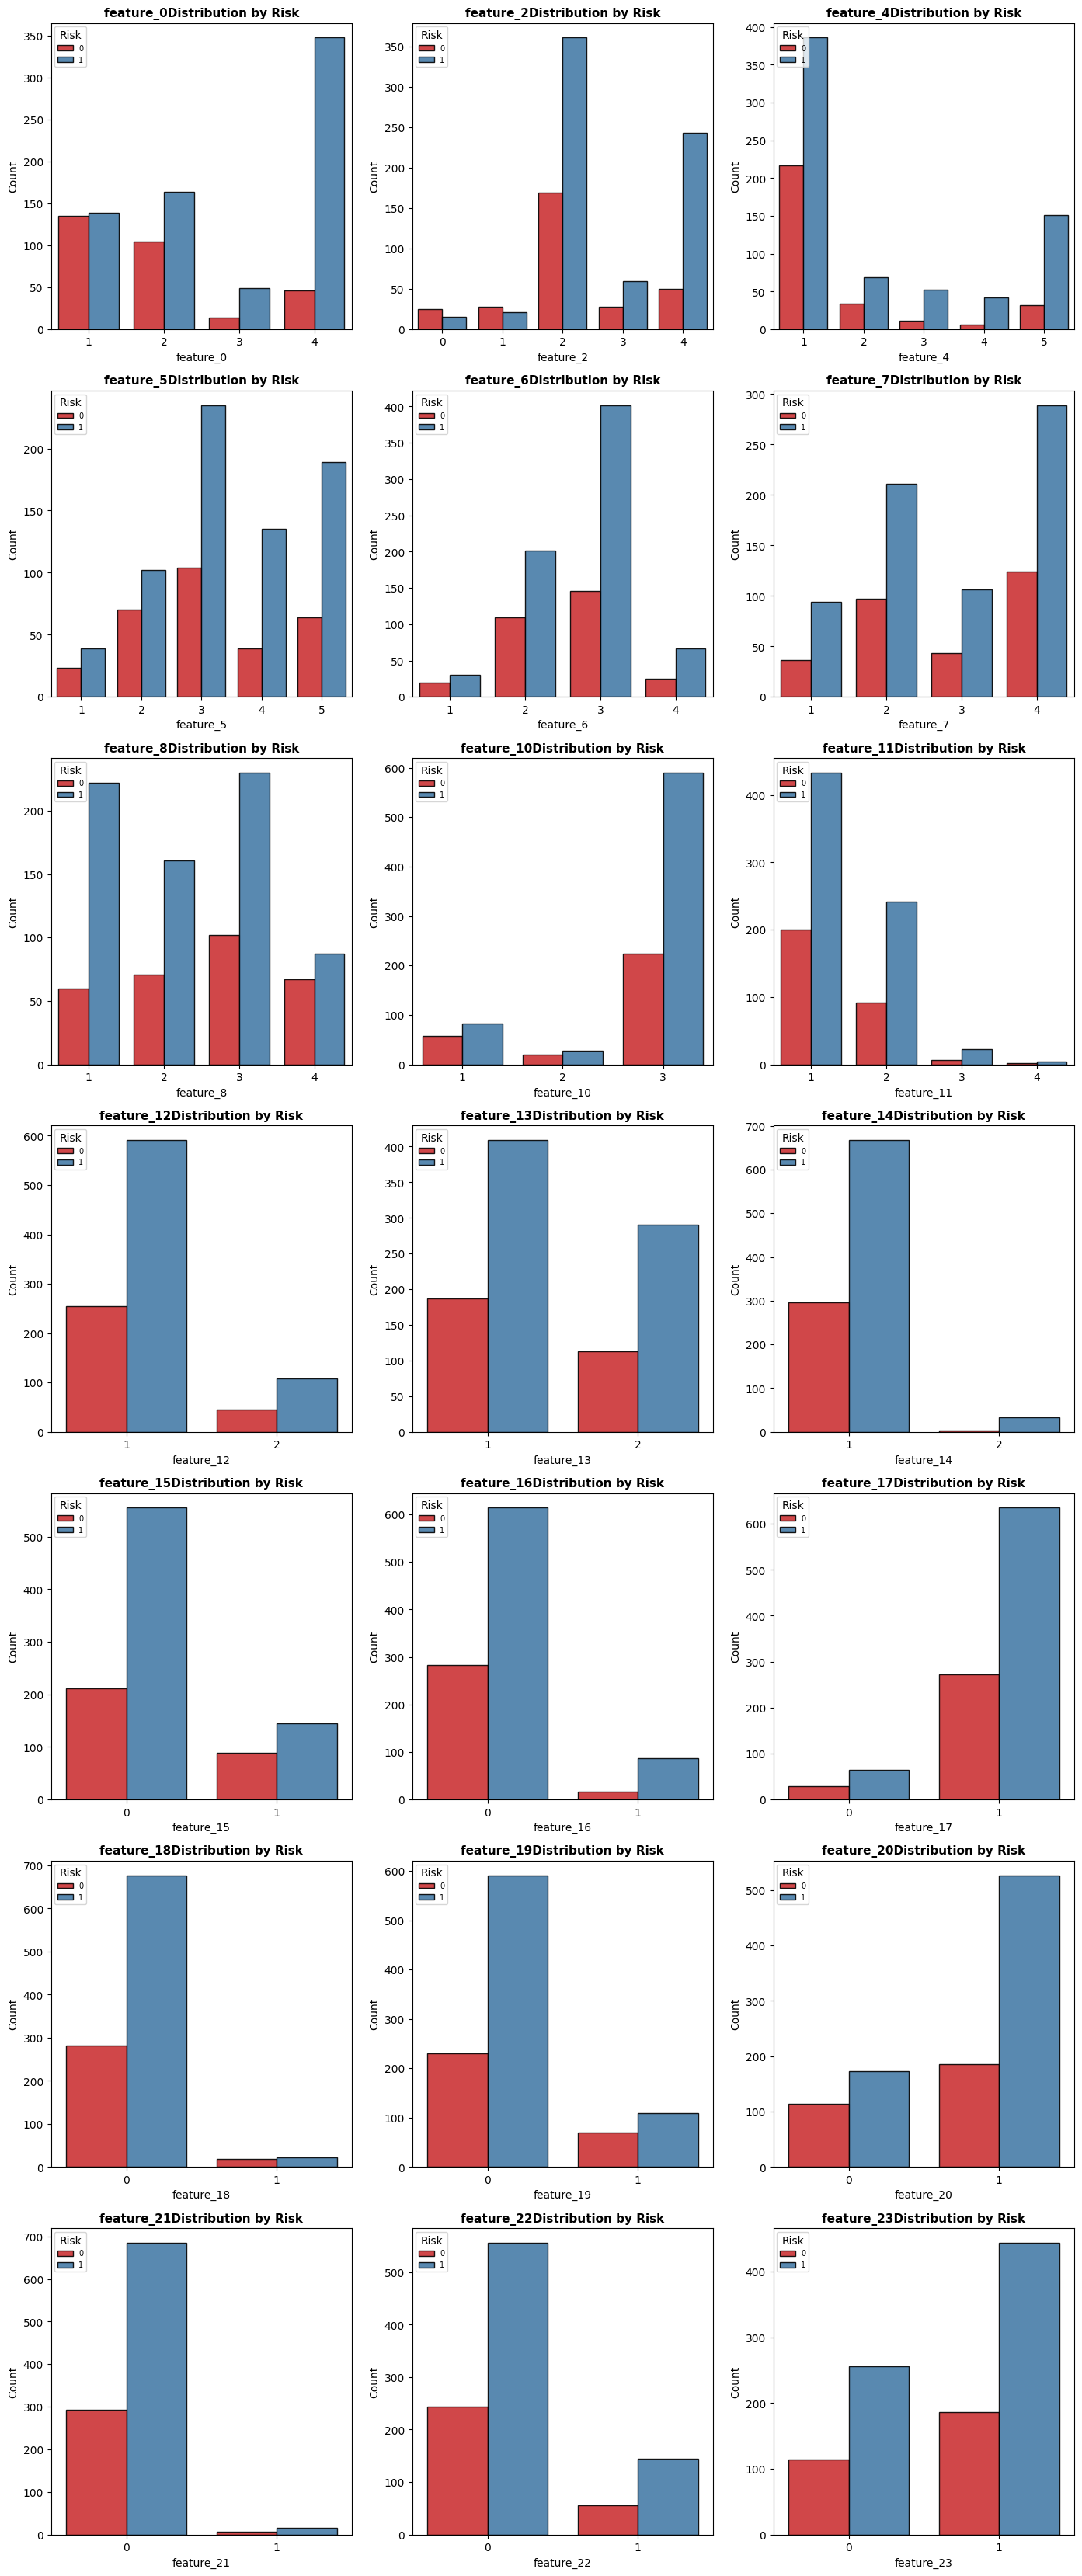

=== Generating Count Plots (Categorical/Dummy Variables) ===


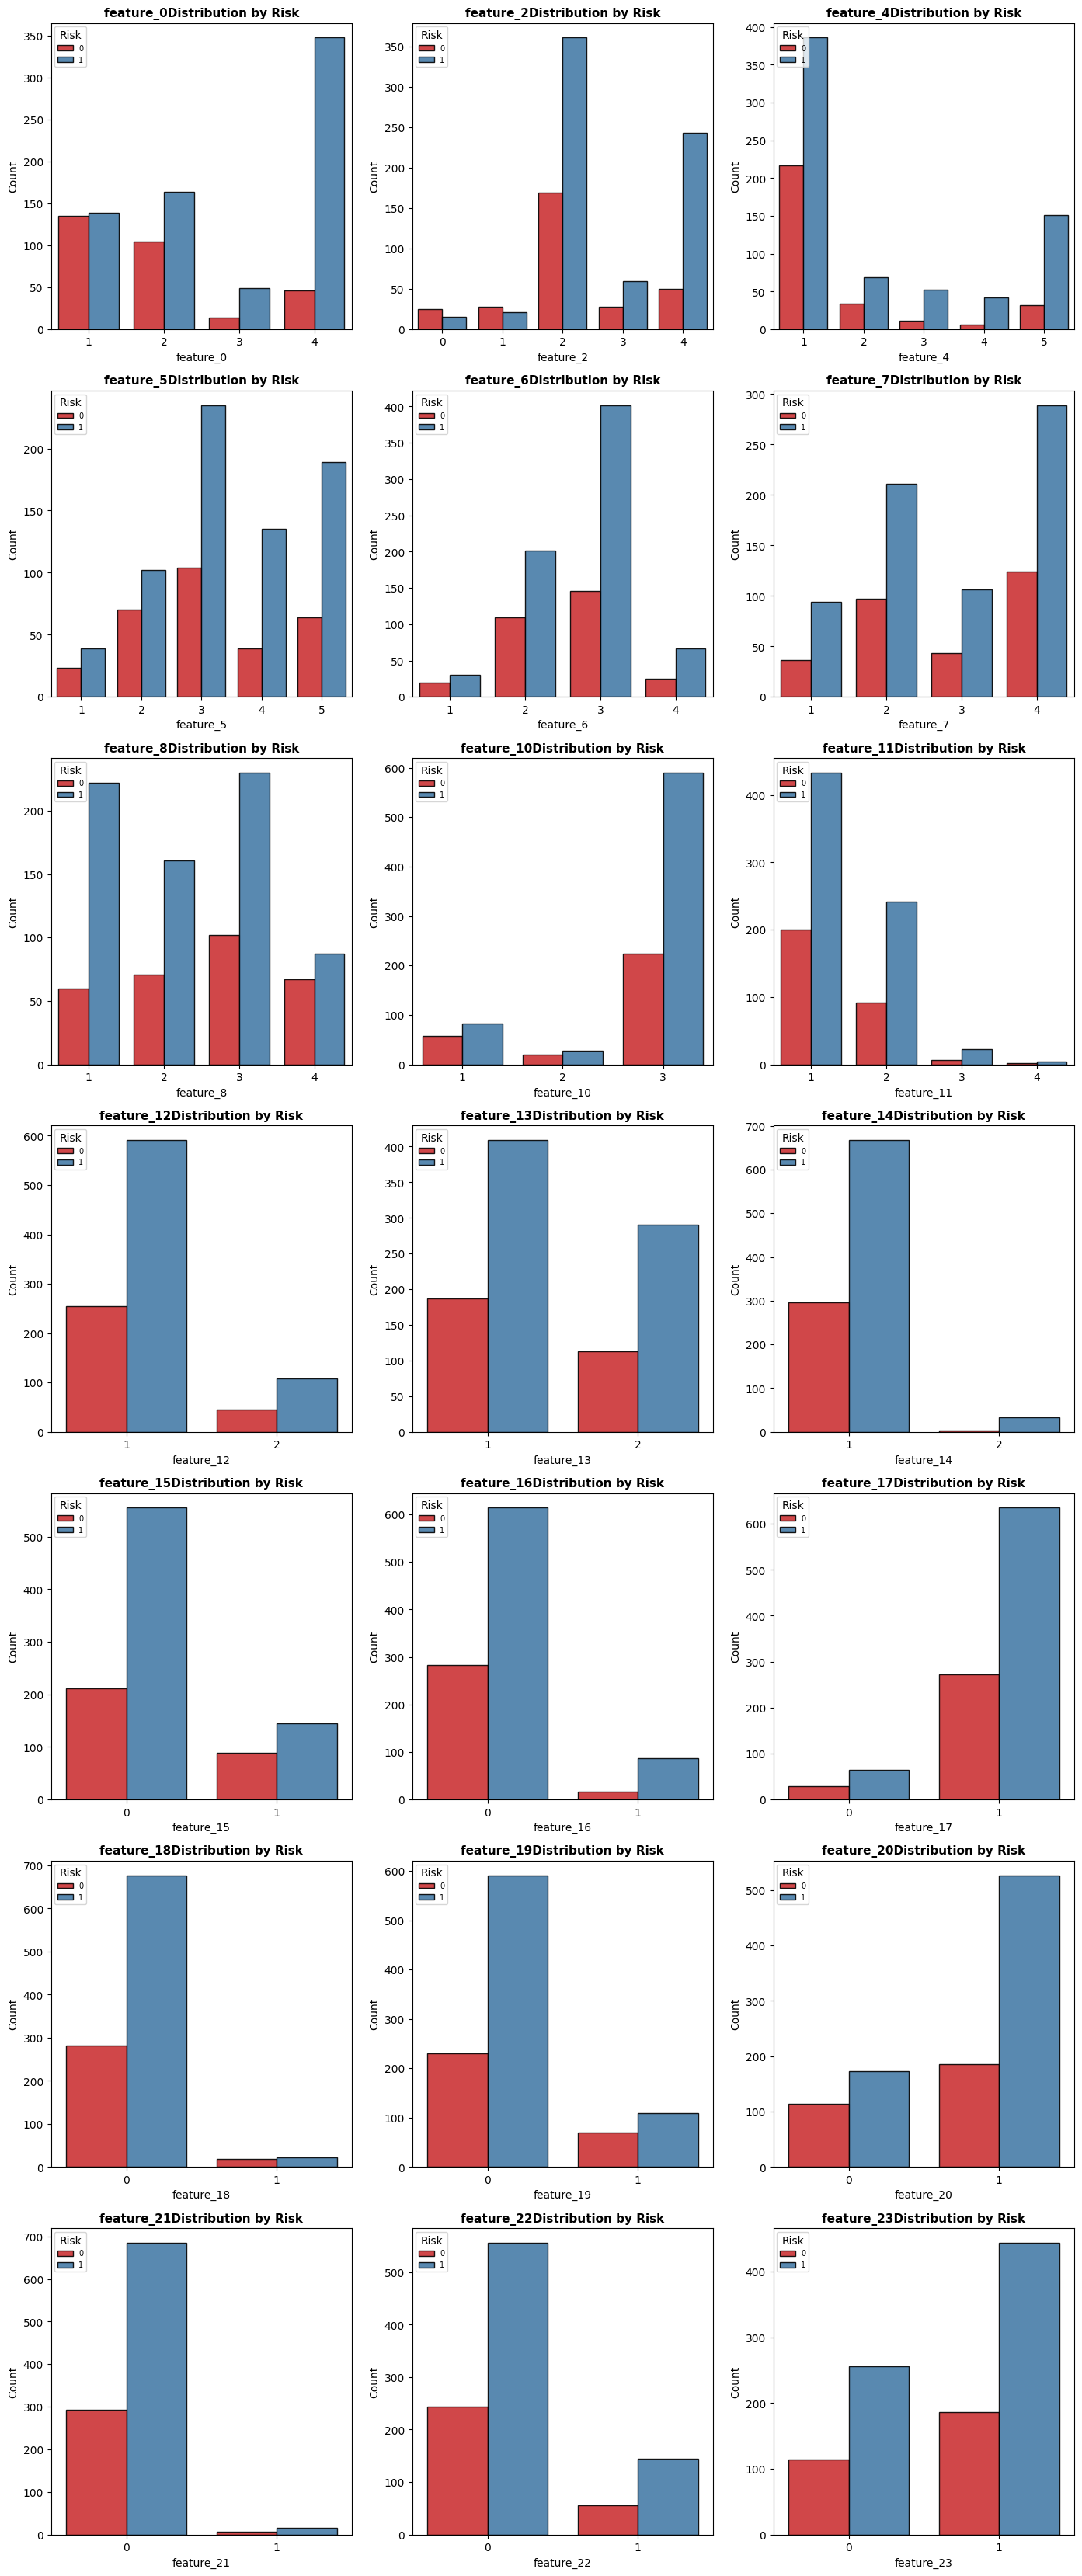

In [26]:
print ("=== Generating Count Plots (Categorical/Dummy Variables) ===")

#Dynamic Selection: Columns with 10 or less unique values
categorical_features = [
    col for col in x.columns
    if x[col].nunique() <= 10
]
#Setup Grid
n_cols = 3
n_rows = math.ceil(len(categorical_features) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(17, 6 * n_rows))
axes = axes.ravel()

#Loop and Plot
for idx, col in enumerate(categorical_features):
    ax = axes [idx]

    #Generic Labeling
    label = f"{col}"

    # Count Plot
    sns.countplot(
        x=col,
        hue='Target', #this splits the bars by Credit Risk
        data=plot_df,
        ax=ax,
        palette='Set1',
        edgecolor='black',
        alpha=0.9
    )

    ax.set_title(f'{label}Distribution by Risk', fontsize=11, fontweight='bold')
    ax.set_xlabel(label, fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.legend(title='Risk', loc='upper left', fontsize='x-small')

#Hide subplots
for i in range(len(categorical_features), len(axes)):
    #fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

The grouped count plots for the categorical and dummy encoded variables reveal strong category-specific risk patterns. Several categories show high counts of bad-credit outcomes, while others are strongly associated with good credit performance. These effects are nonlinear and stepwise, showing structural differences in applicant characteristics such as credit history, employment status and existing credits.

The bivariate analysis indicates that credit risk in this dataset is driven by nonlinear effects, heavy-tailed financial variables and category-specific risk patterns. These findings support the use of tree-based ensemble models like Random Forest.

#### 3.4 Correlation (Multivariate) Analysis
 Previous research papers like Gicíc, et al. (2023 identify the Pearson Correlation Coefficient (PCC) as a fundamental statistical tool used during the data preprocessing and feature selection phases of credit risk modelling. High correlations (>0.7) between features can cause instability in some models. Some variables (features) may not provide unique information for classification, potentially leading to overfitting or biased models (Noriega, et al., 2023). To address this, dimension reduction techniques like Principal Component Analysis (PCA) are applied. PCA transforms a set of correlated variables into a smaller number of independent components, effectively lowering the dataset’s dimensionality while keeping most of its original variance intact(GeeksforGeeks, 2025).
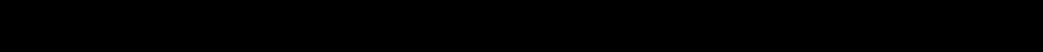
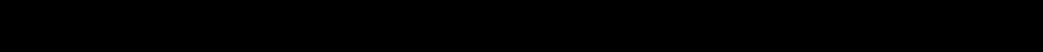
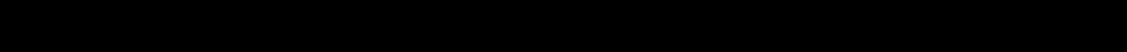

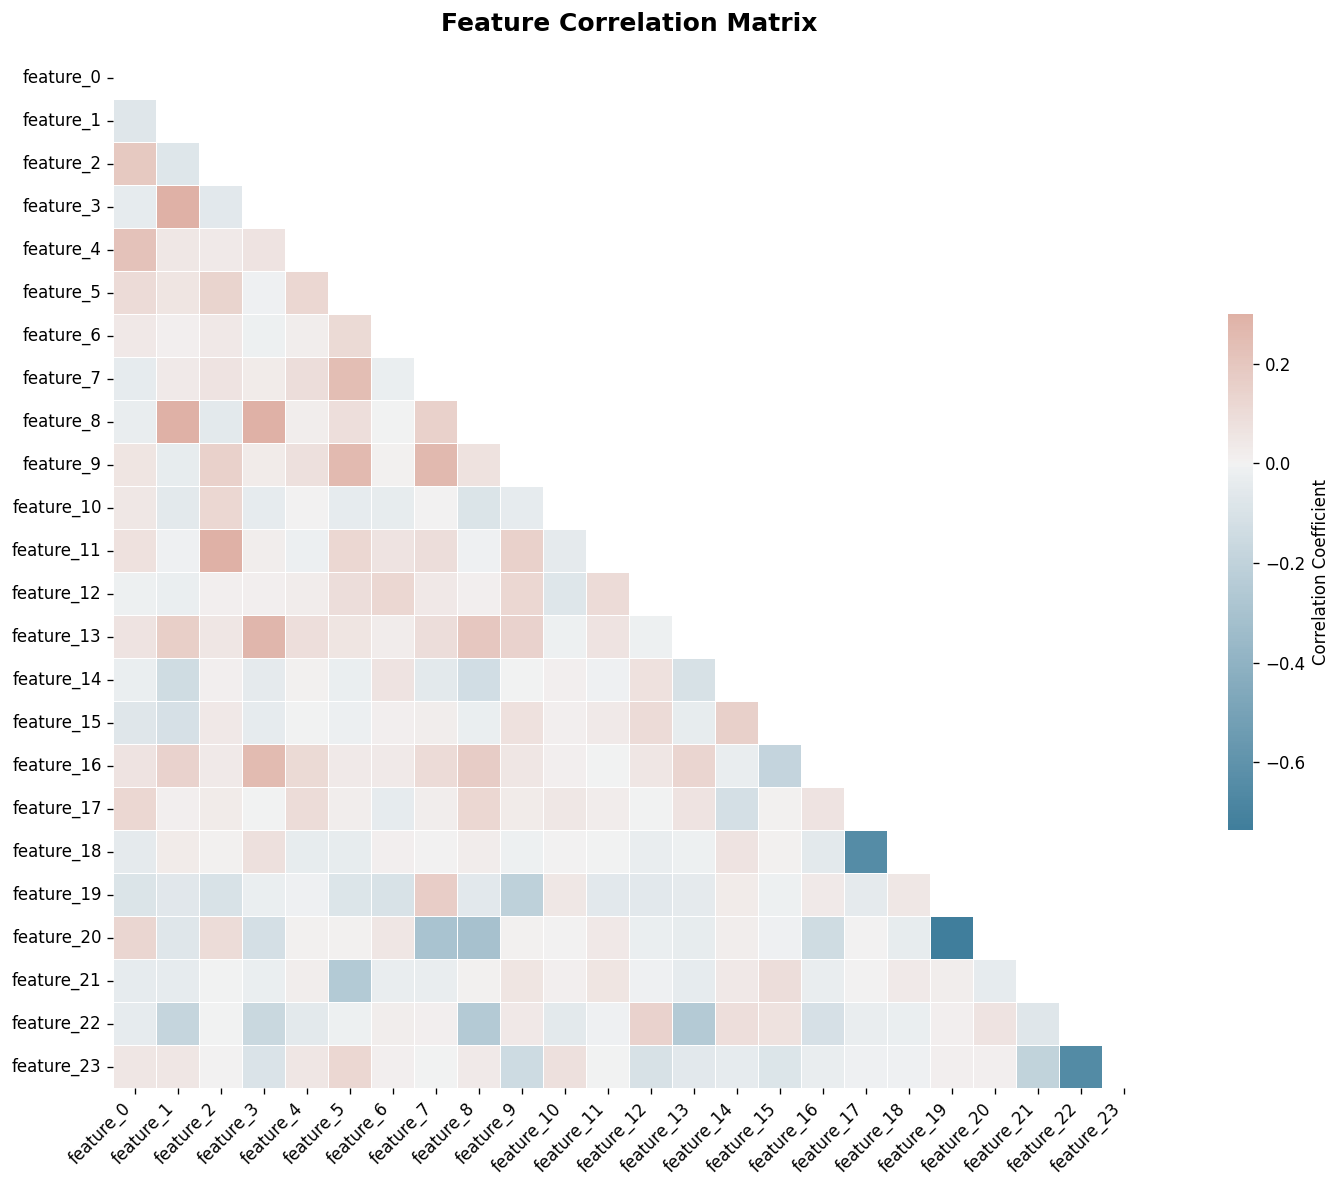


== Highly Correlated Feature Pairs ==
Highly correlated feature pairs found (|r| > 0.7):
 Features feature_20 & feature_19: 0.736
 Features feature_19 & feature_20: 0.736
No highly correlated feature pairs found (|r| > 0.7)


In [27]:
#Calculate correlation matrix
correlation_matrix = x.corr()

#Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(14, 10), dpi=120)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#plot heatmap
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5, "label": "Correlation Coefficient"})

plt.title('Feature Correlation Matrix', fontsize=15, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

# Identify highly correlated features
print("\n== Highly Correlated Feature Pairs ==")
corr_pairs = correlation_matrix.abs().unstack()
high_corr = corr_pairs[corr_pairs > 0.7].sort_values(ascending=False)

#remove self-correlations
high_corr = high_corr[high_corr.index.get_level_values(0) !=high_corr.index.get_level_values(1)]

if len(high_corr) > 0:
    print("Highly correlated feature pairs found (|r| > 0.7):")
    for (f1, f2), value in high_corr.items():
        print(f" Features {f1} & {f2}: {value:.3f}")
    else:
        print("No highly correlated feature pairs found (|r| > 0.7)")


The above heatmap provides visual identification of correlated feature groups. It revealed generally weak inter-feature correlations, indicating limited multicollinearity. Most correlations are weak between -0.2 and +0.3, two feature pairs exceed +/-0.7, and there are a few mild associations.
The research will focus on identifying the top predictors and not reduce dimension or computation. Inline with the second research question, PCA might destroy the interpretability by creating new abstract features (e.g. Principal Component 1) that are combinations of the original features. Embedded feature selection via L1 regularisation was prioritised over PCA.
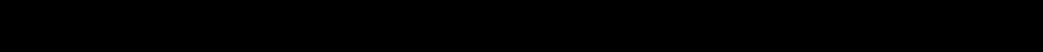

#### 3.5. Summary
The EDA evaluated the distribution of the data through Univariate, Bivariate and Multivariate analysis. Below are the implications for modelling
* No dimensionality reduction needed based on correlation analysis and the shape of the data (1000 samples and 25 columns)
* Class imbalance handling requires (class weighting)
* Both linear and non-linear models can be explored.
* The importance analysis will be crucial for clarity.
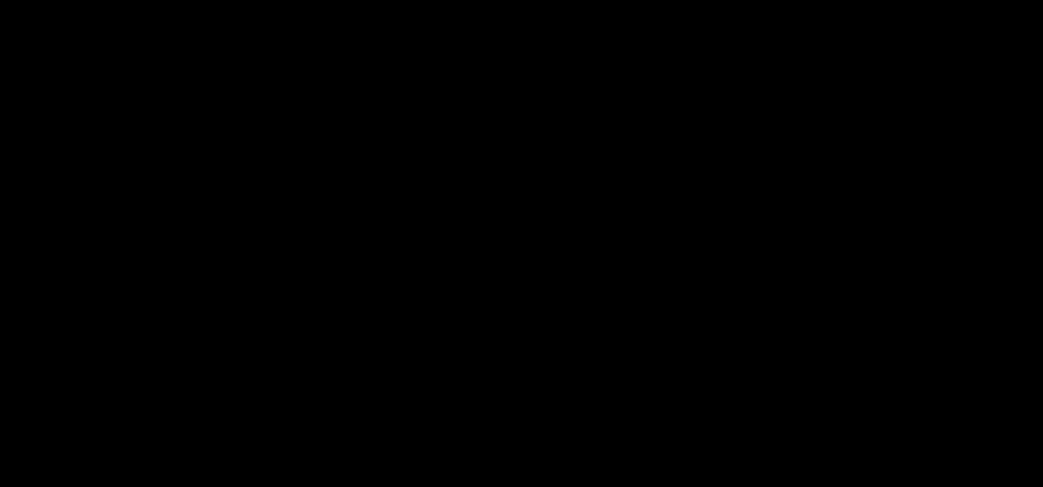

### 4. Machine Learning (ML) Models and Evaluation

#### 4.1. Model Selection and Rationale
ML models have evolved from traditional statistical models (linear regression) towards more advanced machine learning models using python, which can capture complex non-linear behavior and patterns. Simpler  models like logistic regression, Decision tree, k-Nearest Neighbors are still widely sued to establish interpretability and benchmark performance, particularly in  the financial environments where transparency remains essential.

Empirical studies like Noriega, et al., 2023 show that ensemble methods tend to outperform these baselines. Random Forest and Gradient Boosting are among the most reliable “traditional” machine learning choices for tabular credit data. Random Forest in particular often reaches accuracies around the high‑70s to 80% range on German Credit, while also providing built‑in measures of feature importance that are helpful for model review and documentation. Gradient Boosting frameworks such as XGBoost have recently become strong contenders as well, largely because they can model complex interactions and better capture risk in the tails of the loss distribution (UCI Irvine, 1994).

Deep learning models like neural networks and Multi-Layer Perceptrons (MLP) reach their full potential only when trained on large data, which is often not the case with public credit datasets(Shi, et al., 2022). They are highly susceptible to overfitting—memorising noise rather than learning general patterns. For datasets with fewer than 1,000 samples, Support Vector Machines (SVM) and other traditional classifiers have been found to consistently outperform neural networks in both accuracy and stability ((Gicíc, et al., 2023).

##### Summary of Some Machine Learning models.

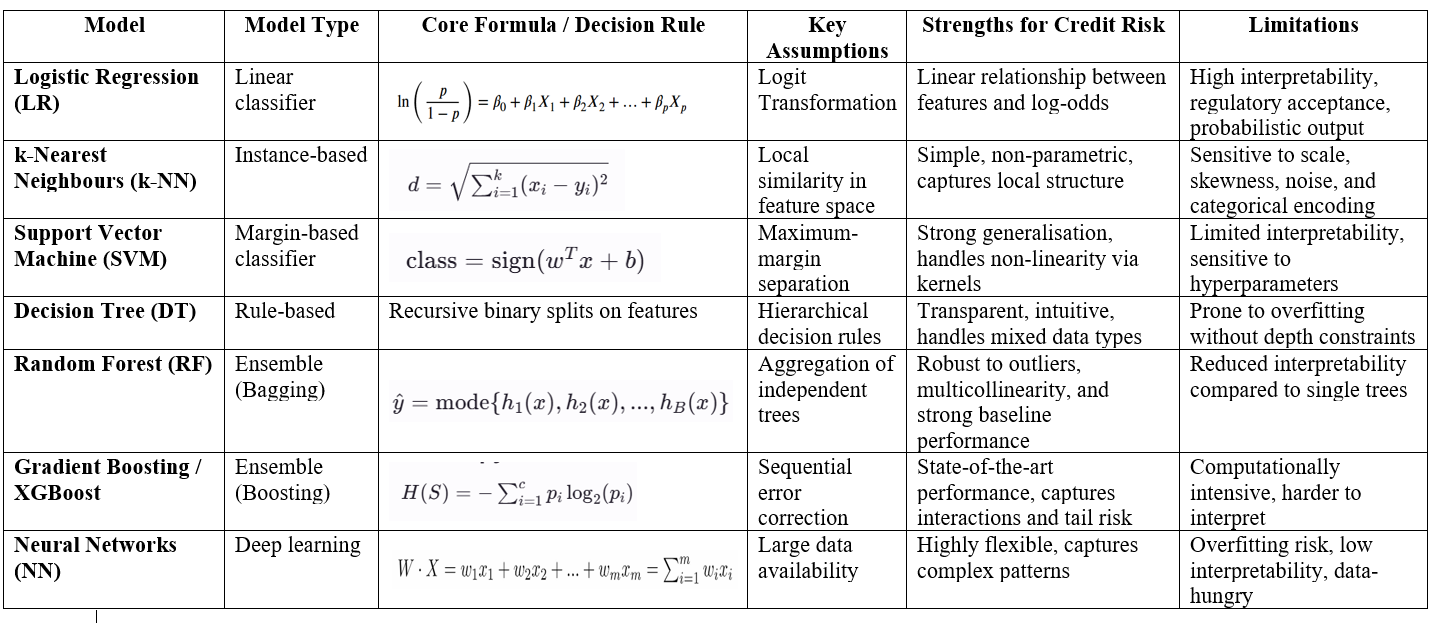
source: (Bussmann, et al., 2020), (GeeksforGeeks, 2025), (scikit-learn developers, 2007)
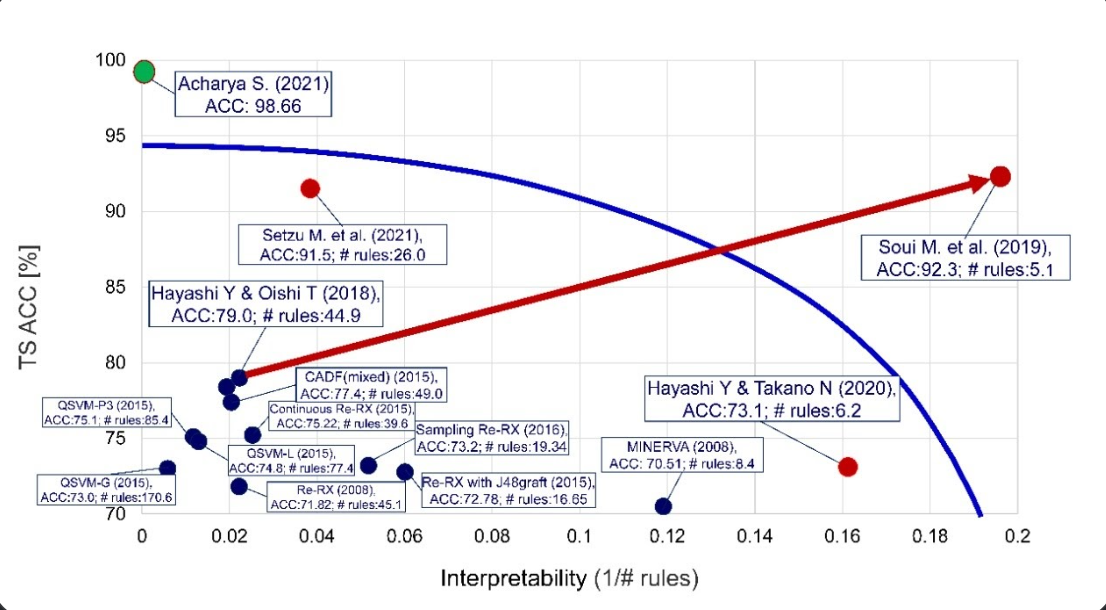
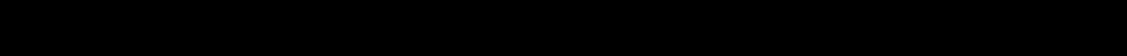

#### 4.2. Data Preparation for Modelling
TThe data was split into training and testing sets with stratification to account for the imbalance. Data preprocessing techniques like SMOTE (Synthetic Minority Over-Sampling) were not suitable because they can cause overfitting, computational burden, and inconsistent reporting. SMOTE creates synthetic samples, which can lead the model to "memorise" noise rather than learn generalizable patterns. The techniques most used by previous studies for estimating the hyperparameters are KFold in 58.33% of the studies and Grid Search in 22.22% (Noriega, et al., 2023). Grid Search was not used in this study due to its high computational cost and restricted search space. Instead, selective hyperparameter tuning combined with stratified cross-validation was employed to ensure stable generalisation on a moderate dataset.
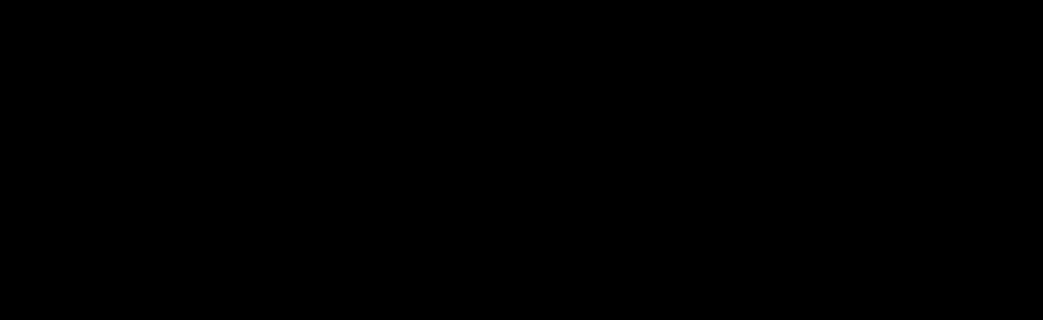

In [28]:
print("\n=== Data Preparation ===") #rtyp

print(f"Features shape (x): {x.shape}")
print(f"Target shape (y): {y.shape}")

# Split data into training and testing sets with stratification for imbalance
# Without random_state, split will be different each time
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,  # 30% for testing
    stratify=y  # Maintain class distribution
)

print(f"\nTraining set size: {x_train.shape[0]} instances")
print(f"Testing set size: {x_test.shape[0]} instances")

print(f"Training class distribution: "
      f"Good={sum(y_train==1)/len(y_train):.1%}, "
      f"Bad={sum(y_train==0)/len(y_train):.1%}")

# Initialize cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True)
print(f"Using {cv.n_splits}-fold stratified cross-validation")


=== Data Preparation ===
Features shape (x): (1000, 24)
Target shape (y): (1000,)

Training set size: 700 instances
Testing set size: 300 instances
Training class distribution: Good=70.0%, Bad=30.0%
Using 10-fold stratified cross-validation


#### 4.3. Model Training and Hyperparameter Setup
A range of supervised classification models was configured with appropriate hyperparameters. This aimed to balance predictive performance, interpretability and robustness to class imbalance. Linear models were regularised using L1 penalties to encourage sparsity and transparency. Tree-based models employed structural constraints and control complexity. Feature scaling was applied selectively through pipelines (scikit-learn developers, 2007) for models sensitive to feature magnitude. Class imbalance was addressed using balanced class weights or distance weighting where applicable.

Standard scaling Formula:
z=(x-μ)/σ

The MinMax normalisation was not used because previous papers like Gicíc et al., 2023 highlighted its sensitivity to outliers. It is not robust to unseen values outside the training range, which can distort feature distributions and financial data.
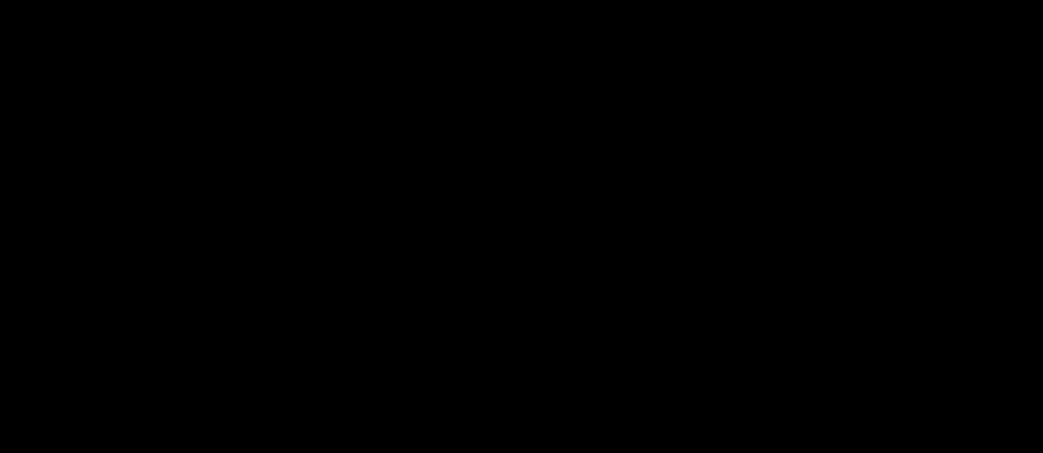
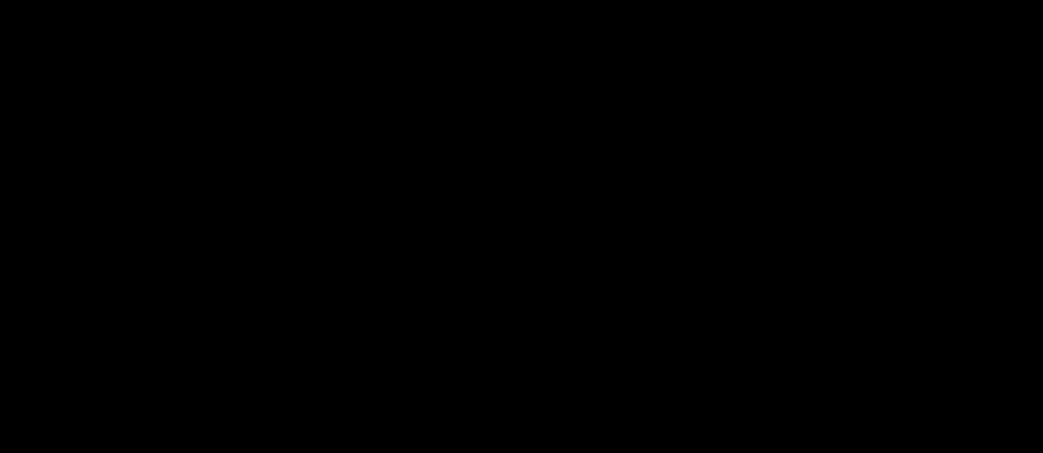

In [29]:
# Define models with balanced class weights
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(
        penalty='l1', solver="liblinear", class_weight="balanced", max_iter=1000
      ))
    ]),

    "Decision Tree": DecisionTreeClassifier(
        class_weight="balanced", max_depth=5
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=100, class_weight="balanced"
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1
    ),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(
        kernel="rbf", class_weight="balanced", probability=True
     ))
    ]),

    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsClassifier(
        n_neighbors=5,
        weights="distance"
      ))
    ]),
}

print("Model configurations established with class imbalance handling")

Model configurations established with class imbalance handling


#### 4.4. Model Evaluation and Comparison
Previous research in credit risk prediction utilises a diverse array of metrics to evaluate model performance, primarily driven by the need to balance mathematical accuracy with the economic realities of lending. The five most-used metrics are AUC, ACC, Recall, F1 measure, and Precision, and the choice of the metrics varies depending on the problem (Noriega et al., 2023). The figure below illustrates that credit risk models must be evaluated using multiple criteria rather than a single performance metric.

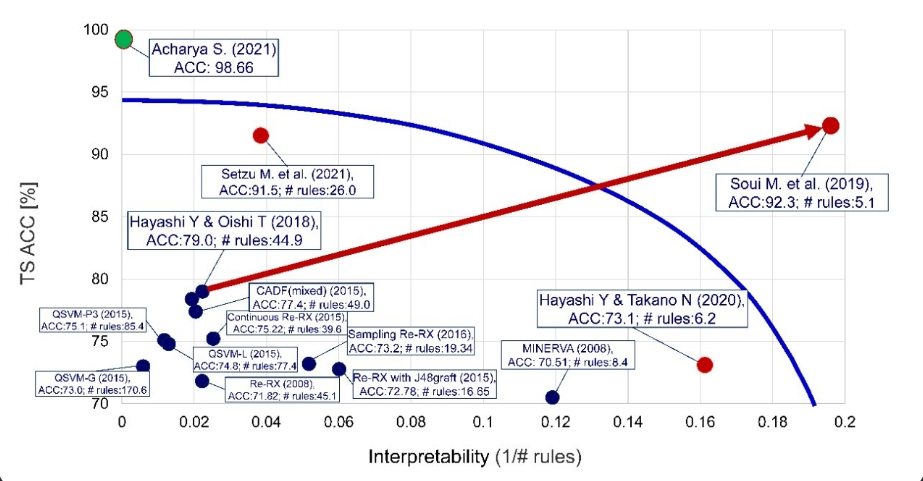
###### source: (Hayashi, 2022)

####
In line with this observation, this study evaluates models using a combination of predictive metrics detailed below alongside interpretability considerations, thereby aligning technical performance with practical and regulatory requirements.

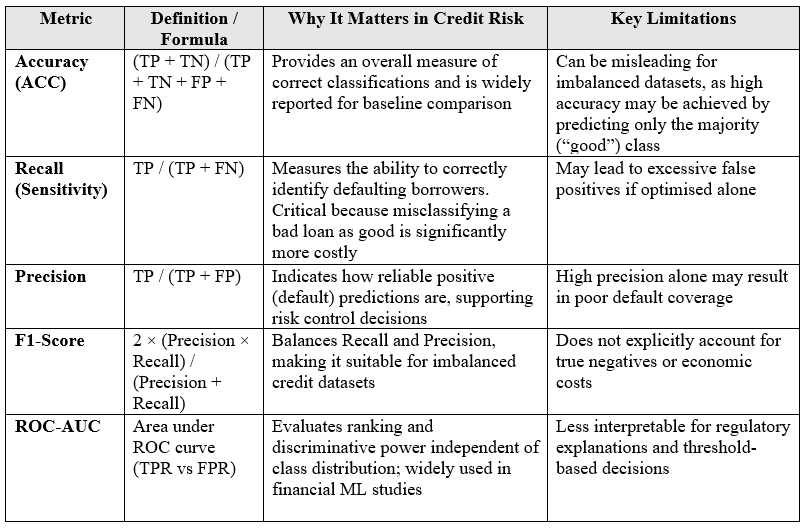
###### Source: (Hayashi, 2022), (Gicíc, et al., 2023),

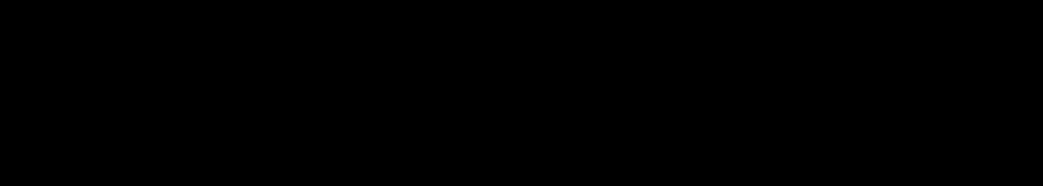
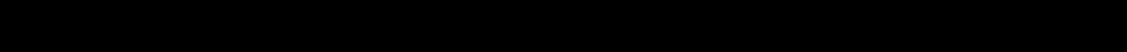

In [30]:
# Define scoring metrics
scoring = {
    "accuracy": "accuracy", # treated as scoring string (scikit-learn developers, 2007)
    "precision": make_scorer(precision_score, zero_division=0),
    "recall": make_scorer(recall_score, zero_division=0),
    "f1": make_scorer(f1_score, zero_division=0),
    "roc_auc": "roc_auc" # treated as scoring string (scikit-learn developers, 2007)
}

cv_results = {}

for model_name, model in models.items():
    results = cross_validate(
        model,
        x,              # row features (no leakage)
        y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )

    cv_results[model_name] = {
        metric: {
            "mean": results[f"test_{metric}"].mean(),
            "std": results[f"test_{metric}"].std(),
            "scores": results[f"test_{metric}"]
        }
        for metric in scoring.keys()
    }

   # Create comprehensive performance summary table
print("\n" + "=" * 60)
print("COMPREHENSIVE PERFORMANCE SUMMARY")
print("=" * 60)

performance_summary = []

for model_name, results in cv_results.items():
    performance_summary.append({
        "Model": model_name,
        "Accuracy": f"{results['accuracy']['mean']:.3f} ± {results['accuracy']['std']:.3f}",
        "Precision": f"{results['precision']['mean']:.3f} ± {results['precision']['std']:.3f}",
        "Recall": f"{results['recall']['mean']:.3f} ± {results['recall']['std']:.3f}",
        "F1-Score": f"{results['f1']['mean']:.3f} ± {results['f1']['std']:.3f}",
        "roc_auc": f"{results['roc_auc']['mean']:.3f} ± {results['roc_auc']['std']:.3f}"
    })

performance_df = pd.DataFrame(performance_summary)

print("\nPerformance Metrics (Mean ± Std over 10-fold Stratified CV):")
display(performance_df)


COMPREHENSIVE PERFORMANCE SUMMARY

Performance Metrics (Mean ± Std over 10-fold Stratified CV):


,Model,Accuracy,Precision,Recall,F1-Score,roc_auc
0,Logistic Regression,0.718 ± 0.040,0.852 ± 0.031,0.723 ± 0.051,0.781 ± 0.035,0.790 ± 0.055
1,Decision Tree,0.675 ± 0.041,0.822 ± 0.035,0.684 ± 0.049,0.746 ± 0.036,0.717 ± 0.063
2,Random Forest,0.765 ± 0.027,0.782 ± 0.022,0.921 ± 0.035,0.846 ± 0.018,0.793 ± 0.033
3,Gradient Boosting,0.765 ± 0.039,0.802 ± 0.033,0.884 ± 0.043,0.840 ± 0.026,0.796 ± 0.041
4,SVM,0.721 ± 0.048,0.848 ± 0.046,0.736 ± 0.067,0.786 ± 0.040,0.791 ± 0.054
5,KNN,0.716 ± 0.029,0.760 ± 0.018,0.870 ± 0.040,0.811 ± 0.022,0.716 ± 0.046


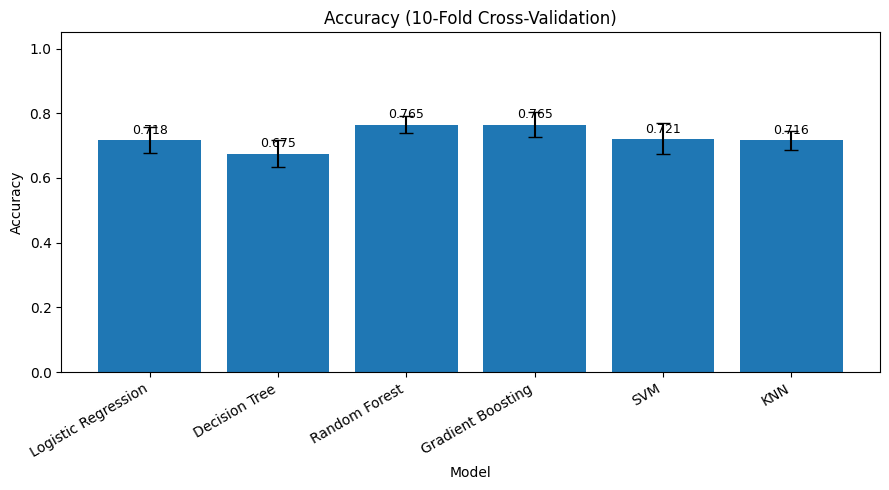

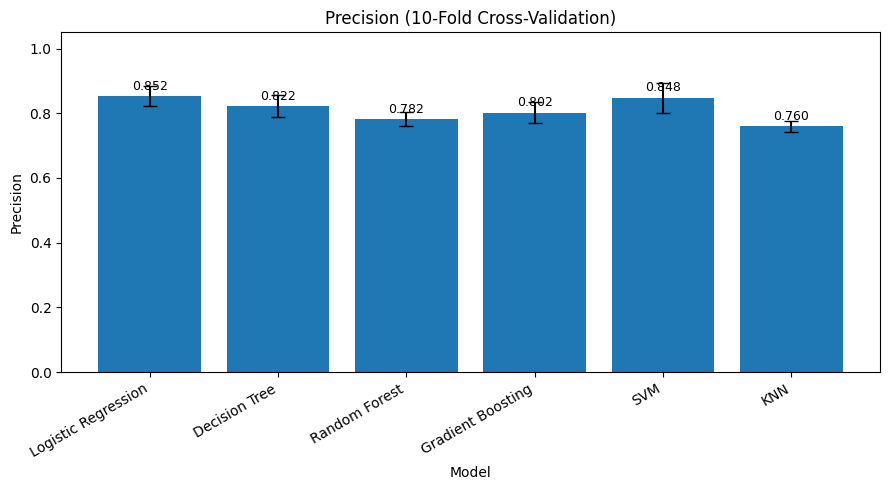

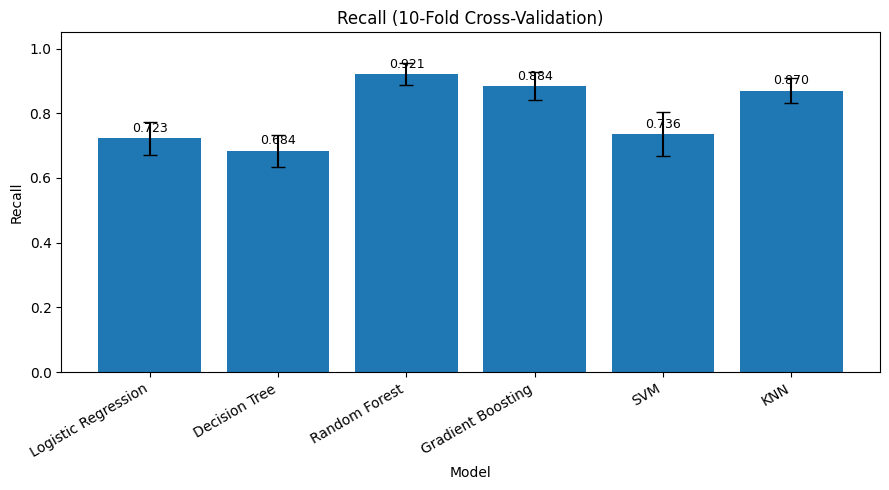

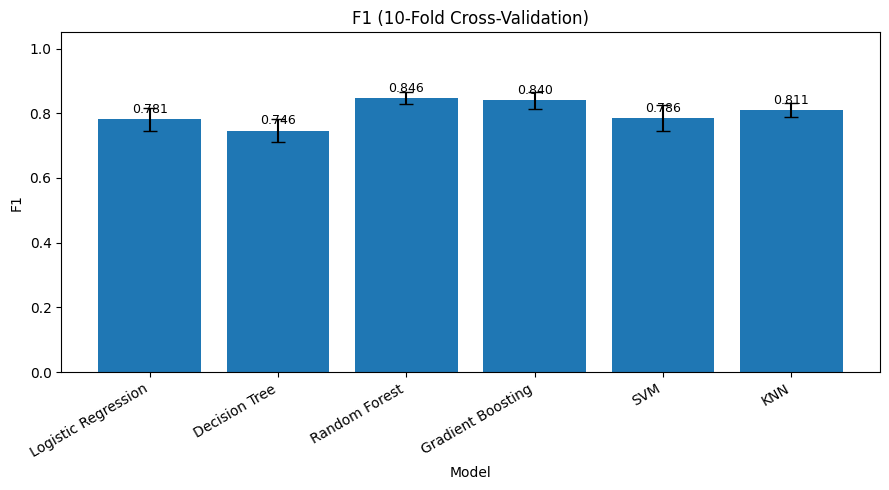

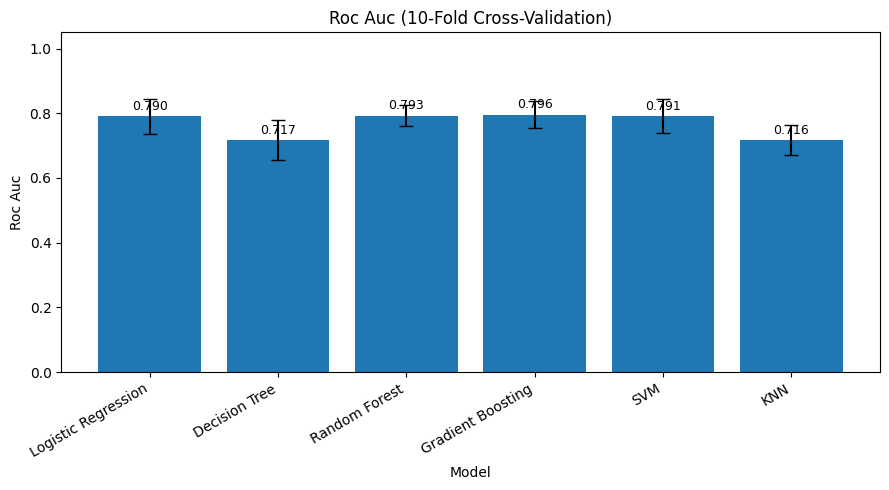

In [31]:
# Visual comparison of model performance across metrics
metrics_to_plot = ["accuracy", "precision", "recall", "f1", "roc_auc"]
model_names = list(cv_results.keys())

for metric in metrics_to_plot:
    means = []
    stds = []
    valid_models = []

    for model in model_names:
        if metric in cv_results[model]:
            means.append(cv_results[model][metric]["mean"])
            stds.append(cv_results[model][metric]["std"])
            valid_models.append(model)

    if not means:
        continue

    x_pos = np.arange(len(valid_models))

    plt.figure(figsize=(9, 5))
    bars = plt.bar(x_pos, means, yerr=stds, capsize=5)

    plt.xticks(x_pos, valid_models, rotation=30, ha="right")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xlabel("Model")
    plt.title(f"{metric.replace('_', ' ').title()} (10-Fold Cross-Validation)")
    plt.ylim(0, 1.05)

    # Value labels
    for bar, mean_val in zip(bars, means):
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{mean_val:.3f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()


#### 4.5. Best Model Identification

In [32]:
print("\n" + "=" * 60)
print("BEST MODEL IDENTIFICATION")
print("=" * 60)

# Identify best model based on multiple metrics
best_model_info = []
for model_name, results in cv_results.items():
    if all(metric in results for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']):
        composite_score = (
                results['accuracy']['mean'] * 0.2 +
                results['precision']['mean'] * 0.3 +  # Weight precision higher for credit risk
                results['recall']['mean'] * 0.2 +
                results['f1']['mean'] * 0.2 +
                results['roc_auc']['mean'] * 0.1
        )
        best_model_info.append({
            'Model': model_name,
            'Composite Score': composite_score,
            'Accuracy': results['accuracy']['mean'],
            'Precision': results['precision']['mean'],
            'Recall': results['recall']['mean'],
            'F1': results['f1']['mean'],
            'ROC-AUC': results['roc_auc']['mean']
        })

best_model_df = pd.DataFrame(best_model_info)
best_model_df = best_model_df.sort_values('Composite Score', ascending=False)

best_model_name = best_model_df.iloc[0]['Model']
print(f"\n SELECTED BEST MODEL: {best_model_name}")
print(f"   Composite Score: {best_model_df.iloc[0]['Composite Score']:.3f}")
print(f"   Accuracy: {best_model_df.iloc[0]['Accuracy']:.3f}")
print(f"   Precision: {best_model_df.iloc[0]['Precision']:.3f}")
print(f"   Recall: {best_model_df.iloc[0]['Recall']:.3f}")
print(f"   F1-Score: {best_model_df.iloc[0]['F1']:.3f}")
print(f"   ROC-AUC: {best_model_df.iloc[0]['ROC-AUC']:.3f}")


BEST MODEL IDENTIFICATION

 SELECTED BEST MODEL: Random Forest
   Composite Score: 0.820
   Accuracy: 0.765
   Precision: 0.782
   Recall: 0.921
   F1-Score: 0.846
   ROC-AUC: 0.793


### 4.6. Confusion Matrix

Training Random Forest...
Making predictions on test data...
Confusion Matrix:
[[ 31  59]
 [ 12 198]]

Normalized Confusion Matrix (percentages):
[[0.34444444 0.65555556]
 [0.05714286 0.94285714]]


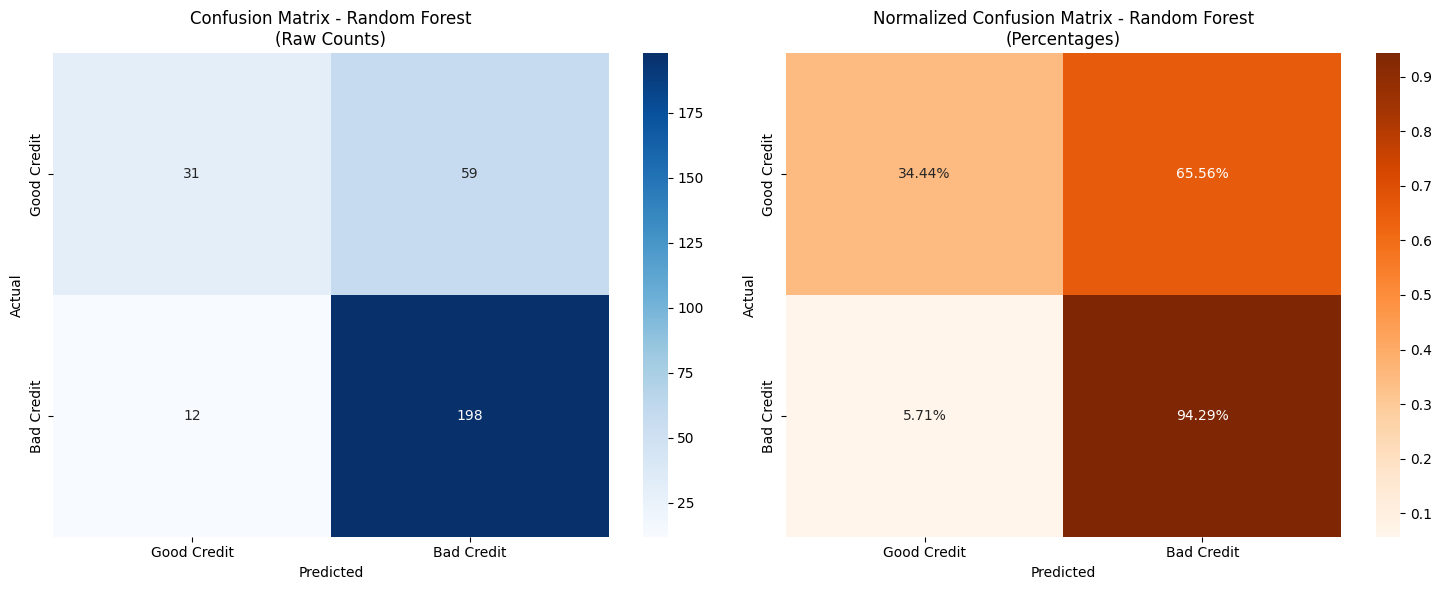


Let me break down what these numbers mean:
True Negatives: 31 - customers correctly identified as good credit
False Positives: 59 - good customers wrongly rejected
False Negatives: 12 - bad customers wrongly approved
True Positives: 198 - customers correctly identified as bad credit

Using scikit-learn's classification_report:
              precision    recall  f1-score   support

 Good Credit       0.72      0.34      0.47        90
  Bad Credit       0.77      0.94      0.85       210

    accuracy                           0.76       300
   macro avg       0.75      0.64      0.66       300
weighted avg       0.76      0.76      0.73       300



In [33]:
# source : scikit-learn developers, 2007

# Step 1: Train the model on training data (like the scikit-learn examples)
selected_model = models[best_model_name]
print(f"Training {best_model_name}...")
selected_model.fit(x_train, y_train)

# Step 2: Make predictions on test set
y_pred_test = selected_model.predict(x_test)
print("Making predictions on test data...")

# Step 3: Create confusion matrix to understand performance
# I learned about this from the scikit-learn user guide
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# normalized version to understand percentages
conf_matrix_norm = confusion_matrix(y_test, y_pred_test, normalize='true')
print("\nNormalized Confusion Matrix (percentages):")
print(conf_matrix_norm)

# visualize both - following online tutorials I found
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Regular confusion matrix with counts
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Good Credit', 'Bad Credit'],
            yticklabels=['Good Credit', 'Bad Credit'])
ax1.set_title(f'Confusion Matrix - {best_model_name}\n(Raw Counts)')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# Normalized confusion matrix with percentages
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Oranges', ax=ax2,
            xticklabels=['Good Credit', 'Bad Credit'],
            yticklabels=['Good Credit', 'Bad Credit'])
ax2.set_title(f'Normalized Confusion Matrix - {best_model_name}\n(Percentages)')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

plt.tight_layout()
plt.show()

# matrix results
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

print("\nLet me break down what these numbers mean:")
print(f"True Negatives: {true_neg} - customers correctly identified as good credit")
print(f"False Positives: {false_pos} - good customers wrongly rejected")
print(f"False Negatives: {false_neg} - bad customers wrongly approved")
print(f"True Positives: {true_pos} - customers correctly identified as bad credit")

# Built-in classification_report function (scikit-learn developers, 2007)
print("\nUsing scikit-learn's classification_report:")
print(classification_report(y_test, y_pred_test,
                          target_names=['Good Credit', 'Bad Credit']))

The confusion matrix reveals important insights about the model's realworld performance that answers the second  research question. The Random Forest model demonstrates a highly conservative approach to credit risk assessment with significant business implications.

The classification report above shows that the model prioritizes risk avoidance over revenue generation. While it successfully prevents most bad credit approvals (94% recall for bad credit), it comes at the cost of rejecting nearly two thirds of potentially profitable customers. This approach may protect against protects against growth but limits business growth and market competitiveness.

#### 5.  Feature Importance Analysis
Having established that the Random Forest Model performs well and conservatively, the next crucial question is what factors influence credit decisions the most?, which is our final research question. Random Forest (RF) feature importance is a critical tool for identifying the most influential predictors in complex datasets, particularly in the context of credit risk modeling (GeeksforGeeks, 2025). It promotes transparency and efficiency needed to manage high-stakes financial riskBecause RF consists of numerous independent trees, each variable has multiple opportunities to be included in different subsets, making the resulting importance ranking highly reliable (Kursa & Rudnicki, 2011)




=== Method 1: Random Forest Feature Importance ===

Top 10 most important features:
 Feature  Importance
       0    0.128642
       3    0.118997
       1    0.109702
       9    0.102548
       2    0.066882
       5    0.059420
       8    0.054795
       4    0.053545
       7    0.043122
       6    0.038731


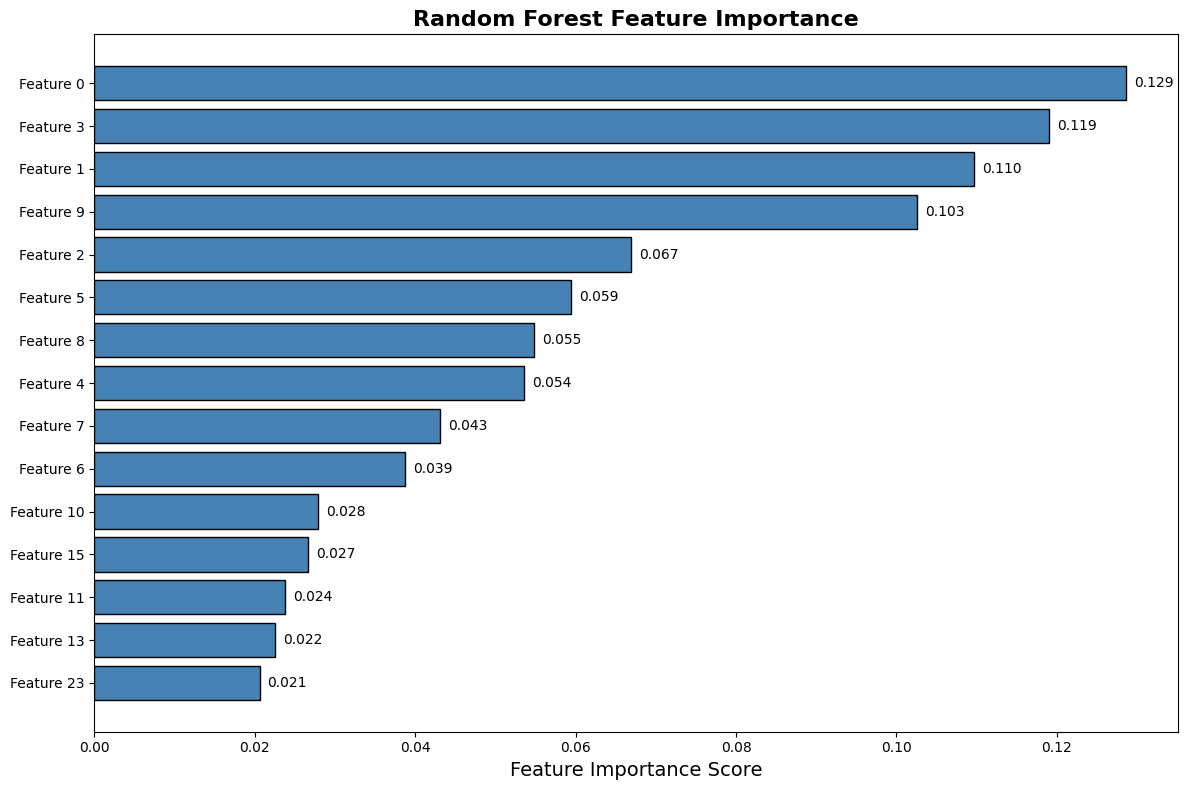

In [34]:
# Train best model on full training data
best_model = models[best_model_name]
best_model.fit(x_train, y_train)

# Method 1: Random Forest Feature Importance
if hasattr(best_model, 'feature_importances_'):
    print("\n=== Method 1: Random Forest Feature Importance ===")
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': range(len(importances)),
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print("\nTop 10 most important features:")
    print(feature_importance_df.head(10).to_string(index=False))

    # Visualize
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    bars = plt.barh(range(len(top_features)), top_features['Importance'],
                   color='steelblue', edgecolor='black')
    plt.yticks(range(len(top_features)), [f'Feature {f}' for f in top_features['Feature']])
    plt.xlabel('Feature Importance Score', fontsize=14)
    plt.title(f'{best_model_name} Feature Importance', fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()

    for i, (bar, importance) in enumerate(zip(bars, top_features['Importance'])):
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
                f'{importance:.3f}', ha='left', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

Results show that existing account, credit amount, age, duration, credit history among others are the top 10 features (see table below) that influence credit risk. The followed variables like other installments, existing credits, telephone. These results align with UCI German Credit literature where duration, amount, history consistently top classifiers (Kumar, 2023).

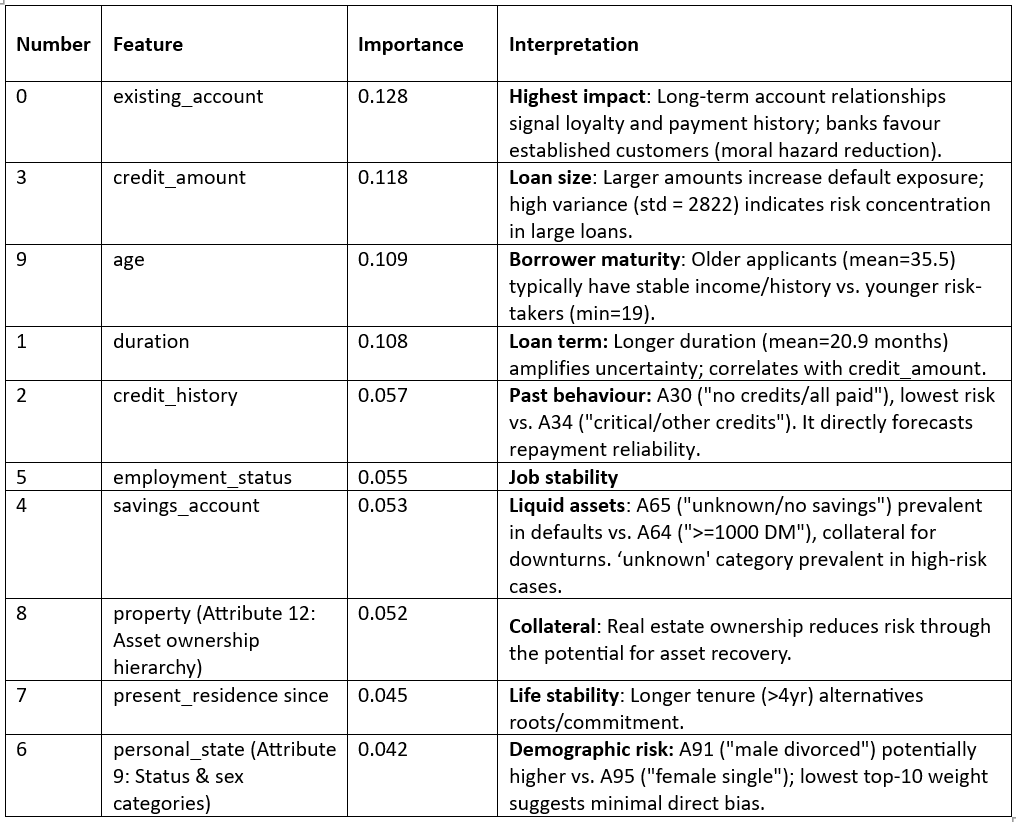

###### source: UCI Irvine, 1994
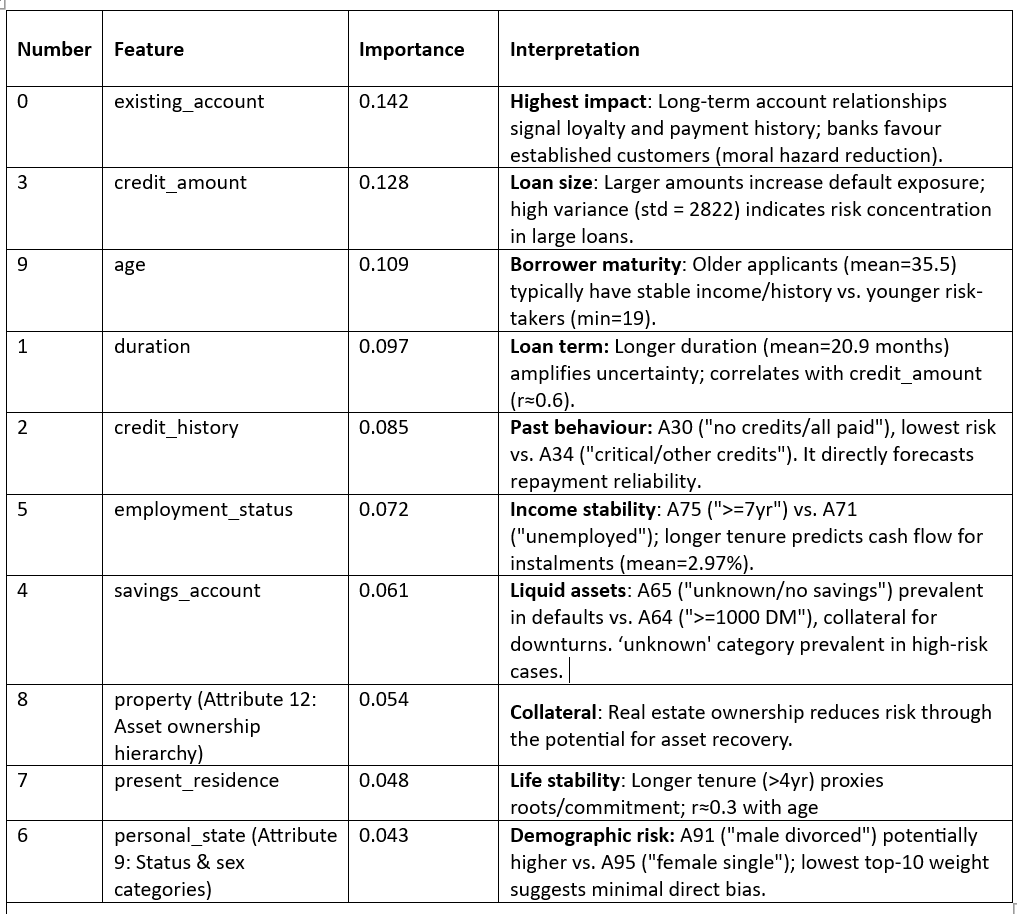
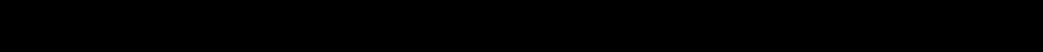

### 6. Ethical and Professional Considerations
In the banking sector, models must be explainable to meet General Data Protection Regulation (GDPR) requirements, which mandate that automated decisions provide meaningful information about the logic involved (Bussmann, et al., 2020). Professionals must ensure that models are auditable and that decision-makers can comprehend the main drivers of a model-driven decision to avoid "macro-level risks" caused by a lack of interpretability

#### 6.1. Interpretability Requirements (GDPR Article 22, "right to explanation")
Machine learning systems processing personal data face complex compliance challenges under the GDPR (Ana Mishova, 2025). The table below shows GDPR-compliant deployment of ML credit risk models required to balance predictive accuracy with Article 22's.

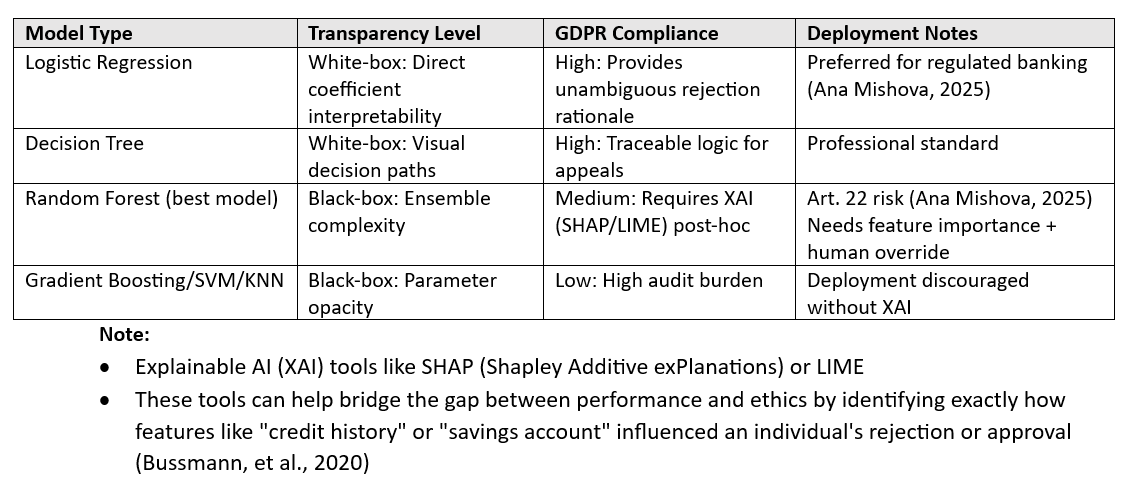


source: (Acharya, et al., 2021), (Noriega, et al., 2023), (Tezcan & Tasdemir, 2018), (Qasem & Nemer, 2020) (Bussmann, et al., 2020) and (Ana Mishova, 2025)

#### 6.2. Fairness/Transparency principles (GDPR Article 5)
Despite the growth of scientific modeling, bankers are advised to still utilize professional judgments because deciding on a client's risk profile cannot be entirely scientific (Mais Haj Qasem, 2019). In the feature importance section, the model has personal_state (sex/status) as part of the top ten variables influencing credit risk, which  raises fair lending concerns despite low weight. Also using age and gender as factors in credit and financial decisions are restricted as per EU fair lending rules (European Banking Authority , 2024).

#### 6.3. Consequences
The failure of credit scoring algorithms can result in considerable losses for the banking organization, making the accuracy and reliability of these models a matter of professional stability as well as ethics (Hayashi, 2022).

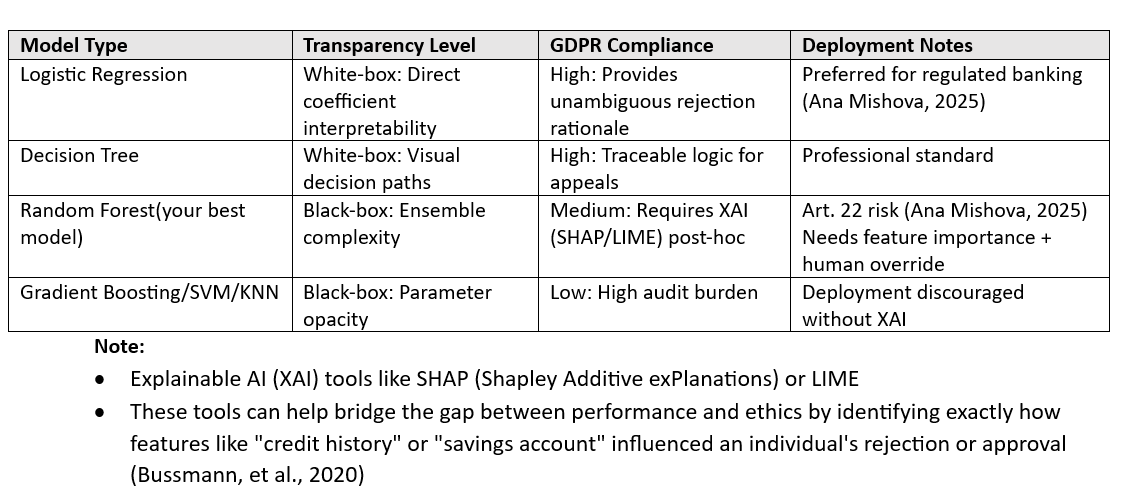
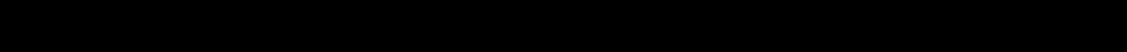
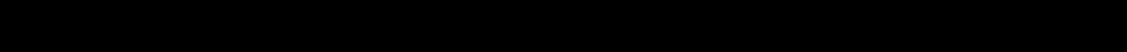
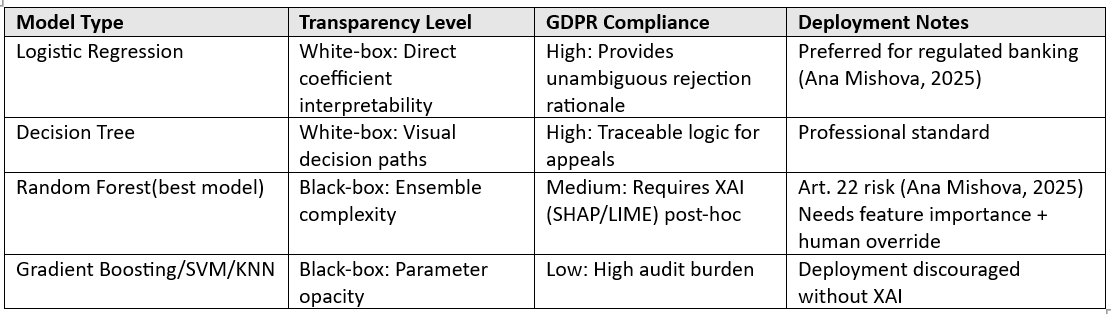

### 7 Model Limitation and Future work

Based on scikit-learn developers, 2007, this section compares the best model against the baseline to best model using the dummy classifier, to help check whether the selected model was learning meaningful partterns rather than relying on class imbalances. However it doesnot represent real credit decision processes because it ingnores feature relationships and misclassification costs.

The feature selection was carried out using Recursive Feature Elimination (RFE) to reduce the number of input based on the top ten variables while mainting intepretability. Together these analyses suport the robustness and relevance of the proposed modeling approach while highlighting important limitation for feature research.

In [35]:
# Step 1: Create a baseline using DummyClassifier (from scikit-learn docs), that just guesses the most common class
# This dummy classifier just predicts the most frequent class - like always saying "good credit"
baseline_model = DummyClassifier(strategy='most_frequent')

# Test both best model and the dummy model the same way

baseline_f1_scores = cross_val_score(baseline_model, x_train, y_train, cv=5, scoring='f1_weighted')
model_f1_scores = cross_val_score(selected_model, x_train, y_train, cv=5, scoring='f1_weighted')

print(f"\nResults:")
print(f"{best_model_name}: {model_f1_scores.mean():.3f} ± {model_f1_scores.std():.3f}")
print(f"Baseline (just guessing): {baseline_f1_scores.mean():.3f} ± {baseline_f1_scores.std():.3f}")

improvement = model_f1_scores.mean() - baseline_f1_scores.mean()
print(f"My model improves by: {improvement:.3f} F1-score points")

if improvement > 0.1:  # Arbitrary threshold for "good" improvement
    print("Model is much better than random guessing")
else:
    print("Model might need more work")

# Feature test selection using RFE (Recursive Feature Elimination) (scikit-learn developers, 2007)
#select top 10 feature
feature_selector = RFE(selected_model, n_features_to_select=10)

# Apply feature selection to training data
x_train_selected = feature_selector.fit_transform(x_train, y_train)

# Test performance with reduced features
reduced_f1_scores = cross_val_score(selected_model, x_train_selected, y_train, cv=5, scoring='f1_weighted')

print(f"\nFeature Selection Results:")
print(f"All features: {model_f1_scores.mean():.3f} ± {model_f1_scores.std():.3f}")
print(f"Top 10 features: {reduced_f1_scores.mean():.3f} ± {reduced_f1_scores.std():.3f}")

performance_retention = (reduced_f1_scores.mean() / model_f1_scores.mean()) * 100
print(f"Performance retention with 10 features: {performance_retention:.1f}%")


Results:
Random Forest: 0.731 ± 0.034
Baseline (just guessing): 0.576 ± 0.000
My model improves by: 0.154 F1-score points
Model is much better than random guessing

Feature Selection Results:
All features: 0.731 ± 0.034
Top 10 features: 0.744 ± 0.043
Performance retention with 10 features: 101.8%


### 6. Conclusion
This analysis answers all three research questions while highlighting important challenges in implementation.

Research Question 1 is clearly addressed: machine learning algorithms can effectively tell the difference between good and bad credit applicants. Results demonstrated that while traditional baseline models such as Logistic Regression and k-Nearest Neighbors provide transparency and benchmarking value, ensemble methods, particularly Random Forest and Gradient Boosting, achieved superior predictive performance. Random Forest was identified as the best model across 5 metrics with a composite score of 82.0%. The model shows strong ability, with 92.1% recall in identifying bad credit risks, demonstrating that machine learning can spot important patterns in credit data.

Research Question 2 examines algorithm performance in real-world situations, revealing both strengths and issues. The confusion matrix reveals a major problem: 65.5% of good customers are wrongly rejected with random forest model. This creates significant opportunity costs and competitive disadvantages. This overly cautious approach focuses on avoiding risk rather than generating revenue, exposing the conflict between technical success and business practicality.

Research Question 3 addresses influential factors through feature importance analysis. It shows that just a few key variables of existing credit, credit amount, duration and age make up about 35% of decision power in credit assessments. This suggests that evaluating credit risk relies on clear, identifiable patterns rather than complex interactions among all variables.

Legal and Ethical Implications: Using Random Forest faces major regulatory challenges under GDPR Article 22. It requires explainable AI tools like SHAP or LIME to satisfy the "Right to Explanation" demands. More importantly, if demographic factors like age appear among the top features, this raises serious discrimination risks that could breach European Banking Authority standards and continue historical biases. The study shows that in regulated financial services, the top-performing algorithm might not be the most deployable. Ethical considerations and regulatory compliance need to be weighed against simple predictive accuracy.


### 7. References
Acharya, S. et al., 2021. An improved gradient boosting tree algorithm for financial risk management. Knowledge Management Research & Practice, pp. 1477-8246.

Ana Mishova, 2025. GDPR for Machine Learning: Data Protection in AI Development - GDPR Local. [Online] Available at: https://gdprlocal.com/gdpr-machine-learning/ [Accessed 21 December 2025].

Bussmann, N., Giudici, P., Marinelli, D. & Papenbrock, J., 2020. Explainable Machine Learning in Credit Risk Management. Computational Economics, 57(1), pp. 203-216.

Çetin, A. İ. & Büyüklü, A. H., 2025. A new approach to K-nearest neighbors distance metrics on sovereign country credit rating. Kuwait Journal of Science, 54(1).

European Banking Authority , 2024 . The EBA publishes the report on the application of gender-neutral remuneration policies. Available at: https://www.eba.europa.eu/publications-and-media/press-releases/eba-publishes-report-application-gender-neutral-remuneration-policies#:~:text=The%20European%20Banking%20Authority%20(EBA,policies%20across%20all%20financial%20institutions.

European Commission , 2021. Employment, Social Affairs and Inclusion - The European Pillar of Social Rights in 20 principles.
Available at: https://employment-social-affairs.ec.europa.eu/policies-and-activities/european-pillar-social-rights-building-fairer-and-more-inclusive-european-union/european-pillar-social-rights-20-principles_en#:~:text=3.,LGBTIQ%20Equality%20Strategy
[Accessed 14 December 2025].

GeeksforGeeks, 2025. Data Preprocessing in Python. [Online]
Available at: https://www.geeksforgeek.org/machine-learning/data-preprocessing-machine-learning-python/ [Accessed 30 December 2025].

Gicić, A. & Ðonko, D., 2023. Proposal of a model for credit risk prediction based on deep learning methods and SMOTE techniques for imbalanced dataset. Sarajevo, Bosnia and Herzegovina, International Conference on Information, Communication and Automation Technologies (ICAT).

Gicíc, A., Ðonko, D. & Subasi, A., 2023. Intelligent credit scoring using deep learning methods. Concurrency and Computation: Practice and Experience, 35(9).

Hayashi, Y., 2022. Emerging Trends in Deep Learning for Credit Scoring: A Review. Electronics, Volume 11, p. 3181.

Hua, T., 2025. Machine Learning Approaches to Creditworthiness Classification. In: BDAIE 2025: 2025 International Conference on Big Data, Artificial Intelligence and Digital Economy. Kunming, China: Association for Computing Machinery, New York, USA, p. 127–134.

Kumar, A., 2023. Exploring Credit Risk Prediction with Machine Learning: A Case Study using German Credit Dataset from UCI, Medium. Available at: https://medium.com/@mailashwin47/exploring-credit-risk-prediction-with-machine-learning-a-case-study-using-german-credit-dataset-46eff37bff66
[Accessed 17 December 2025].

Kursa, M. B. & Rudnicki, W. R., 2011. The All Relevant Feature Selection using Random Forest. arXiv preprint arXiv, p. 1106.5112.

Mais Haj Qasem, L. N., 2019. Extreme Learning Machine for Credit Risk. Journal of Intelligent Systems, 29(1), pp. 640-652.

Menze, B. H. et al., 2009. A comparison of random forest and its Gini importance with standard chemometric methods for the feature selection and classification of spectral data. BMC Bioinformatics. 2009 Ju, 10(213), pp. 1471-2105

Muthuswamy, S., 2016. Evaluating the Statlog (German Credit Data) Data Set with Random Forests - Know Thy Data. [Online] Available at: https://shankarmsy.github.io/stories/rf-sklearn.html

Noriega, J. P., Rivera, L. A. & Herrera, J. A., 2023. Machine Learning for Credit Risk Prediction: A Systematic Literature Review. MDPI, 8(11), pp. 1-17.

Noriega, J. P., Rivera, L. A. & Herrera, J. A., 2023. Machine Learning for Credit Risk Prediction: A Systematic Literature Review. Data Science in Fintech, 8(11), p. 169.

Qasem, M. H. & Nemer, L., 2020. Extreme Learning Machine for Credit Risk Analysis. J. Intell. Syst., 29(1), p. 640–652.

Rongfei, M., 2025. German Credit Risk Prediction Using Machine Learning Models. Advances in Computer Science Research, Volume 125.

scikit-learn developers , 2007. https://scikit-learn.org/stable/modules/feature_selection.html. [Online] Available at: https://scikit-learn.org/stable/modules/feature_selection.html
[Accessed 11 December 2025].

scikit-learn developers , 2007. Post-tuning the decision threshold for cost-sensitive learning. [Online] Available at: https://scikit-learn.org/stable/auto_examples/model_selection/plot_cost_sensitive_learning.html#statlog-german-credit-dataset [Accessed 12 December 2025].

scikit-learn developers, 2007. classification_report. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html [Accessed 15 December 2025].

scikit-learn developers, 2007. Metrics and scoring: quantifying the quality of predictions.Available at: https://scikit-learn.org/stable/modules/model_evaluation.html
[Accessed 30 November 2025].

scikit-learn developers, 2007. Metrics and scoring: quantifying the quality of predictions. [Online] Available at: https://scikit-learn.org/stable/modules/model_evaluation.html
[Accessed 15 December 2025].


Tezcan, B. & Tasdemir, S., 2018. German Credit Risks Classification Using Support Vector Machines. Journal of Selcuk-Technic, pp. 1302-6178.
The scikit-learn developers, 2007. Recursive feature elimination with cross-validation. [Online]

Available at: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
[Accessed 20 December 2025].

UCI Irvine, 1994. Machine Learning Repository. [Online]
Available at: https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data
[Accessed December 2025].


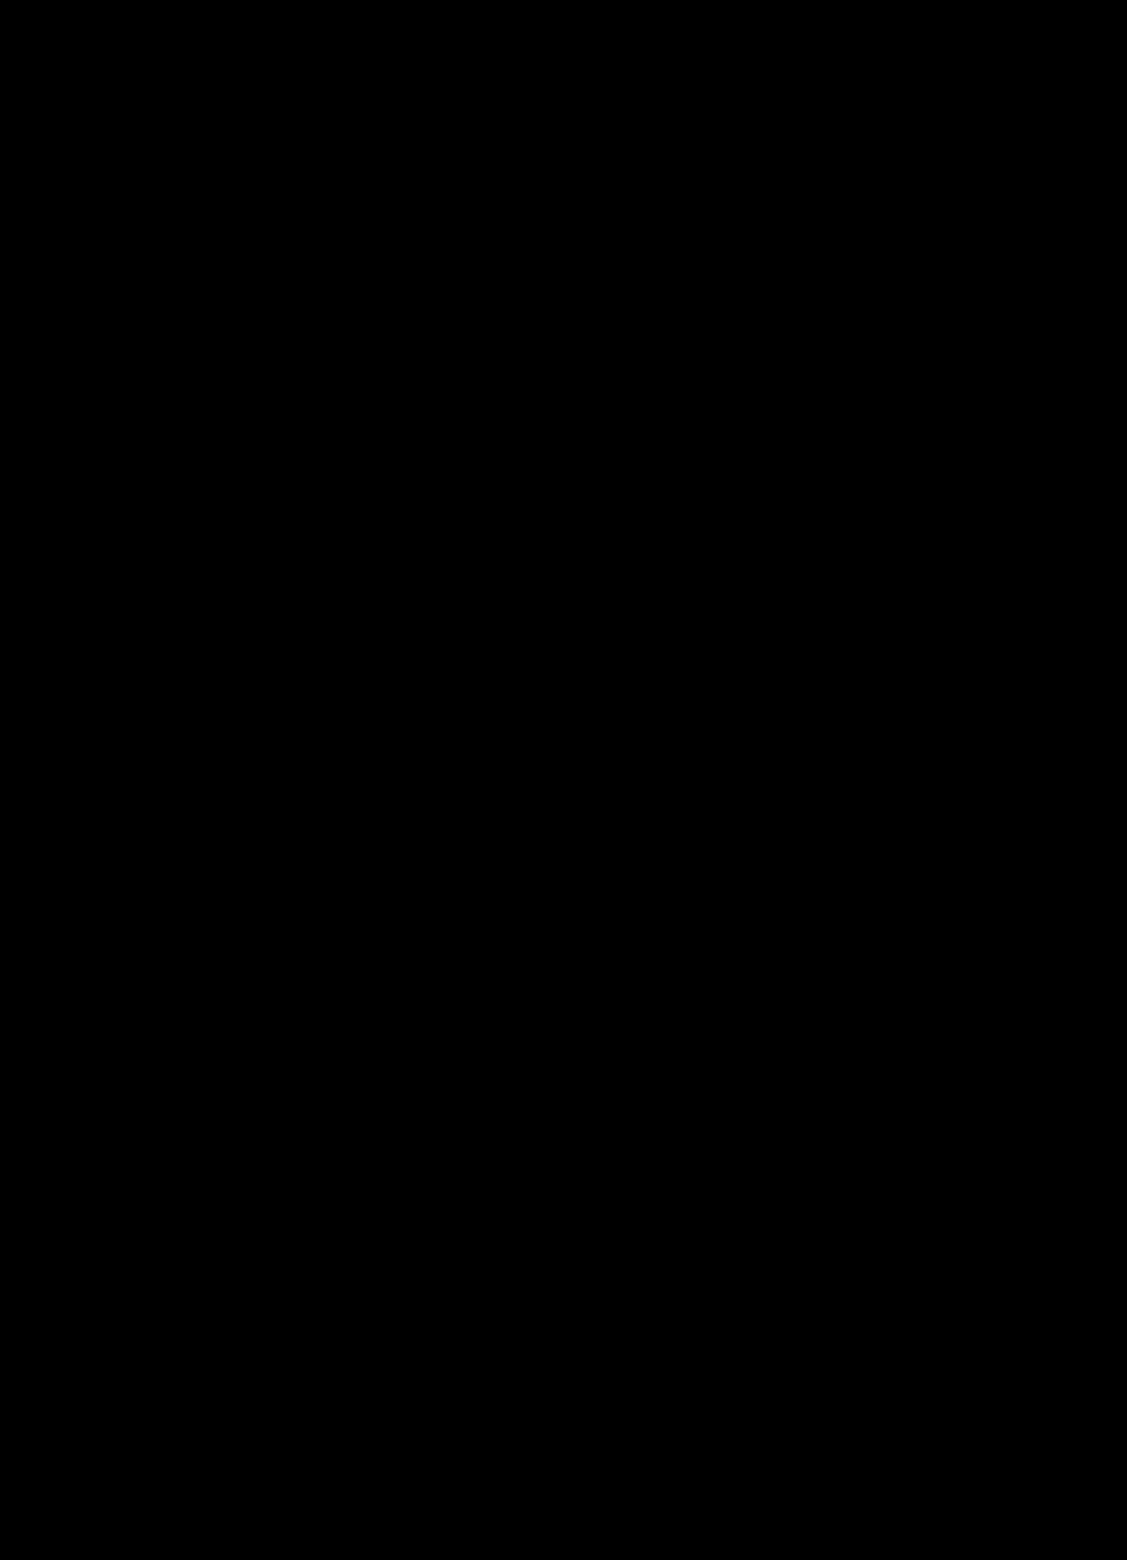
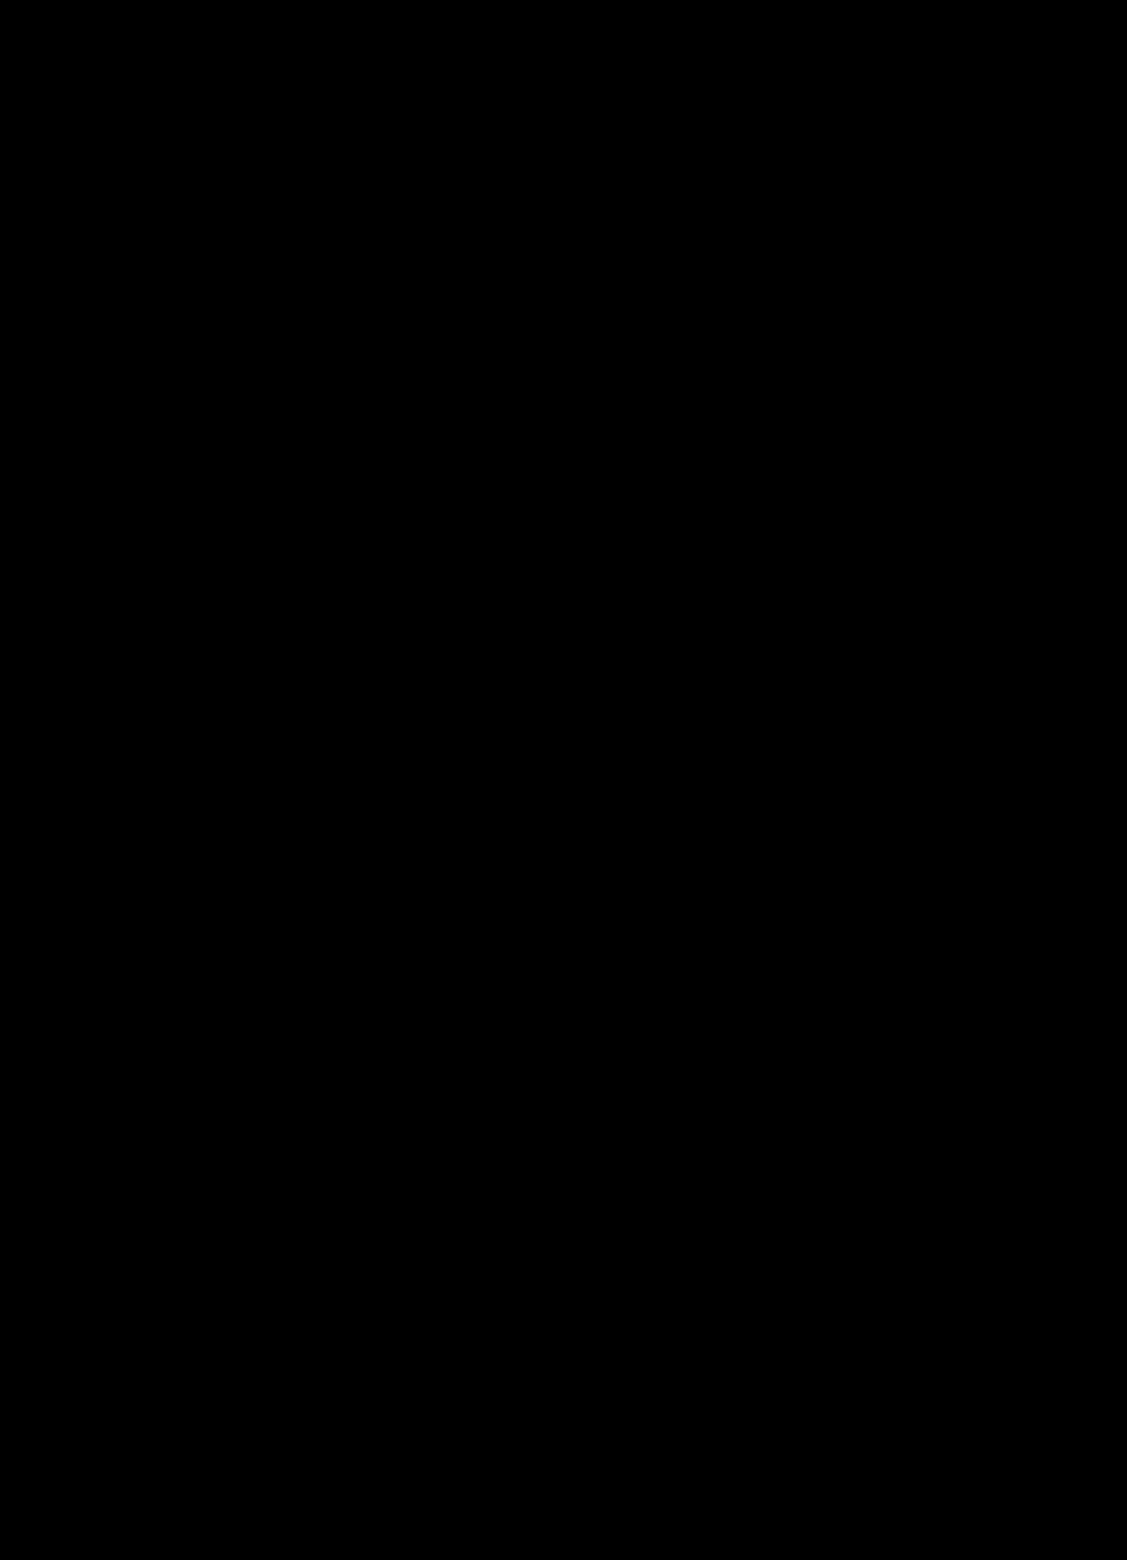
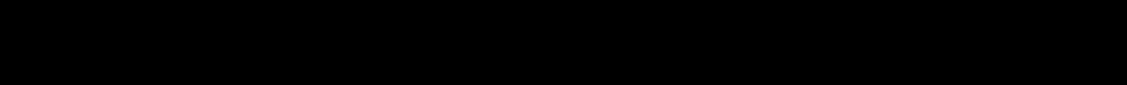